<a href="https://colab.research.google.com/github/JotaBlanco/CryptoAlgoTrading/blob/main/03%20-%20Train%20Models/03%20-%20Train%20Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Variables creation 
Example on creating feature and target variables.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set()
plt.rcParams["figure.figsize"] = (20,5)

# 01 - Import historic data

- Here we will import diverse historic data to add to to the data we are storing in Quix

# 02 - Import data from Quix

In [3]:
token = "eyJhbGciOiJSUzI1NiIsInR5cCI6IkpXVCIsImtpZCI6Ik1qVTBRVE01TmtJNVJqSTNOVEpFUlVSRFF6WXdRVFF4TjBSRk56SkNNekpFUWpBNFFqazBSUSJ9.eyJodHRwczovL3F1aXguYWkvb3JnX2lkIjoicnViZW5ndWlyYWRvIiwiaHR0cHM6Ly9xdWl4LmFpL293bmVyX2lkIjoiYXV0aDB8NzhkNzdkYzQtNDkwNi00YTQzLThkNGEtMjA3MDAwYTIzZTA5IiwiaHR0cHM6Ly9xdWl4LmFpL3Rva2VuX2lkIjoiYWYyYTc0ZDYtYTlkNS00NWQ1LThmMDMtNWMwZjRlM2UwODIwIiwiaHR0cHM6Ly9xdWl4LmFpL2V4cCI6IjE2NTEyNjk2MDAiLCJpc3MiOiJodHRwczovL2F1dGgucXVpeC5haS8iLCJzdWIiOiI5eGNsZGVkcmVNdURRUFhSZHJ5amdtbk96YU01MXdYS0BjbGllbnRzIiwiYXVkIjoicXVpeCIsImlhdCI6MTY0NzAwMzIzMiwiZXhwIjoxNjQ5NTk1MjMyLCJhenAiOiI5eGNsZGVkcmVNdURRUFhSZHJ5amdtbk96YU01MXdYSyIsImd0eSI6ImNsaWVudC1jcmVkZW50aWFscyIsInBlcm1pc3Npb25zIjpbXX0.b2itd0atp6C8IX9Jn68hciQgH80u5jIXW2zz55M67s2g3My9QeKpqaDbeVMcDeQo6WFCr36wMUikcgUkDCOpO7WGUqI_W9tyTUaaOZW_TBVBjgO9SyjYv59xT-QIH2Ejg7bMWB3XMS5SsXUXs7jyFVjn9-S4Sfapm7ogZGZpPNT54dBAH31JURYmj1Ygqw7ySQrGh-gkUj5j_I0Gtt0jqznUpPDeKJOa2Z3S5uwLX9zhIPaOs0cuvc40AHJBVXMfcVkVEd_Sd_Qlqj8btoZA9yoCKUFNC8mQiGQcQuJUGY1GuvQu_CdoiF-TGqSiPSePljfVfHS49bKULWsTHT3Gqg"

In [4]:
def datetime_to_timestamp(datetime_i):    
    # calculate unix datetime
    unix_di = (datetime_i - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')
    unix_di = unix_di * 10**9
    return int(unix_di)

In [ ]:
import requests
import pandas as pd
import io

url = "https://telemetry-query-thevalleyteam1-team1.platform.quix.ai/data/query"
head = {'Authorization': 'Bearer {}'.format(token), 'Accept': "application/csv"}
payload = {
    'from': datetime_to_timestamp(pd.to_datetime("2022/03/18")), 
    'to': datetime_to_timestamp(pd.Timestamp.now()),
    'numericParameters': [
        {'parameterName': 'BTC', 'aggregationType': 'None'},
        {'parameterName': 'ETH', 'aggregationType': 'None'},
        {'parameterName': 'BNB', 'aggregationType': 'None'},
        {'parameterName': 'LUNA', 'aggregationType': 'None'},
        {'parameterName': 'XRP', 'aggregationType': 'None'},
        {'parameterName': 'ADA', 'aggregationType': 'None'},
        {'parameterName': 'SOL', 'aggregationType': 'None'},
        {'parameterName': 'AVAX', 'aggregationType': 'None'},
        {'parameterName': 'DOT', 'aggregationType': 'None'},
        {'parameterName': 'DOGE', 'aggregationType': 'None'},
        {'parameterName': 'BTC_VOL24', 'aggregationType': 'None'},
        {'parameterName': 'ETH_VOL24', 'aggregationType': 'None'},
        {'parameterName': 'BNB_VOL24', 'aggregationType': 'None'},
        {'parameterName': 'LUNA_VOL24', 'aggregationType': 'None'},
        {'parameterName': 'XRP_VOL24', 'aggregationType': 'None'},
        {'parameterName': 'ADA_VOL24', 'aggregationType': 'None'},
        {'parameterName': 'SOL_VOL24', 'aggregationType': 'None'},
        {'parameterName': 'AVAX_VOL24', 'aggregationType': 'None'},
        {'parameterName': 'DOT_VOL24','aggregationType': 'None'},
        {'parameterName': 'DOGE_VOL24', 'aggregationType': 'None'}
        ],
    'streamIds': ['1-in-messari']
}

response = requests.post(url, headers=head, json=payload)

df = pd.read_csv(io.StringIO(response.content.decode('utf-8')))
df['Timestamp'] = [pd.to_datetime(ti) for ti in df['Timestamp']]
df

Timestamp           BTC          ETH         BNB  \
0    2022-03-18 09:19:51.818650  40549.971253  2803.589503  387.411775   
1    2022-03-18 09:21:16.832525  40529.521038  2801.164101  387.022859   
2    2022-03-18 09:22:01.960863  40517.361641  2798.931921  387.035300   
3    2022-03-18 09:22:47.335623  40526.890281  2799.664259  386.957294   
4    2022-03-18 09:23:32.529513  40527.303886  2800.589987  387.011110   
...                         ...           ...          ...         ...   
2756 2022-03-20 07:31:26.948056  41935.672375  2924.815524  398.117113   
2757 2022-03-20 07:32:11.389105  41937.841928  2924.780080  398.126786   
2758 2022-03-20 07:32:56.825152  41938.474657  2925.304606  398.208689   
2759 2022-03-20 07:33:42.290799  41939.696080  2925.769156  398.145146   
2760 2022-03-20 07:34:27.719496  41926.893479  2925.098851  398.137323   

           LUNA       XRP       ADA        SOL       AVAX        DOT  ...  \
0     83.376470  0.785183  0.827648  85.897256  79.440024  18.511092  ...   
1     82.929902  0.784821  0.826939  85.853477  79.387272  18.494557  ...   
2     82.722446  0.784623  0.826544  85.813848  79.310000  18.494207  ...   
3     82.973886  0.784590  0.826685  85.806297  79.344266  18.488618  ...   
4     83.000044  0.784634  0.827119  85.752431  79.305810  18.498373  ...   
...         ...       ...       ...        ...        ...        ...  ...   
2756  92.928560  0.814620  0.904246  91.298950  89.158177  19.331763  ...   
2757  92.944492  0.814676  0.903624  91.307078  89.141237  19.339529  ...   
2758  92.937694  0.814765  0.904156  91.332031  89.215645  19.345362  ...   
2759  93.015722  0.814790  0.903684  91.320368  89.274143  19.348154  ...   
2760  92.974763  0.814508  0.903973  91.299298  89.254300  19.321665  ...   

         BTC_VOL24     ETH_VOL24     BNB_VOL24    LUNA_VOL24     XRP_VOL24  \
0     3.662266e+09  3.608459e+09  3.388266e+08  7.104783e+08  3.462047e+08   
1     3.663862e+09  3.607518e+09  3.389813e+08  7.142548e+08  3.463020e+08   
2     3.664366e+09  3.605565e+09  3.392754e+08  7.164694e+08  3.462410e+08   
3     3.667244e+09  3.608617e+09  3.395761e+08  7.206365e+08  3.464541e+08   
4     3.669540e+09  3.605968e+09  3.397388e+08  7.213463e+08  3.465347e+08   
...            ...           ...           ...           ...           ...   
2756  2.742220e+09  2.306901e+09  3.133482e+08  7.365856e+08  2.870514e+08   
2757  2.742627e+09  2.307103e+09  3.134010e+08  7.366792e+08  2.871125e+08   
2758  2.742982e+09  2.307967e+09  3.134963e+08  7.366955e+08  2.871508e+08   
2759  2.743292e+09  2.308766e+09  3.134867e+08  7.374882e+08  2.872229e+08   
2760  2.743171e+09  2.309213e+09  3.135122e+08  7.373070e+08  2.873614e+08   

         ADA_VOL24     SOL_VOL24    AVAX_VOL24     DOT_VOL24    DOGE_VOL24  
0     1.821010e+08  6.494673e+08  6.539172e+08  1.853846e+08  1.150999e+08  
1     1.820700e+08  6.497360e+08  6.536603e+08  1.853639e+08  1.152552e+08  
2     1.820392e+08  6.496304e+08  6.531513e+08  1.854487e+08  1.152866e+08  
3     1.823561e+08  6.497561e+08  6.538260e+08  1.854004e+08  1.152818e+08  
4     1.825094e+08  6.492364e+08  6.537017e+08  1.855742e+08  1.153202e+08  
...            ...           ...           ...           ...           ...  
2756  3.082358e+08  5.350232e+08  6.047339e+08  2.298095e+08  1.997970e+08  
2757  3.081127e+08  5.351719e+08  6.046740e+08  2.298683e+08  1.999265e+08  
2758  3.082617e+08  5.353612e+08  6.052449e+08  2.299940e+08  1.999265e+08  
2759  3.080902e+08  5.353514e+08  6.056883e+08  2.300421e+08  1.999411e+08  
2760  3.083694e+08  5.352882e+08  6.056923e+08  2.299840e+08  1.999713e+08  

[2761 rows x 21 columns]

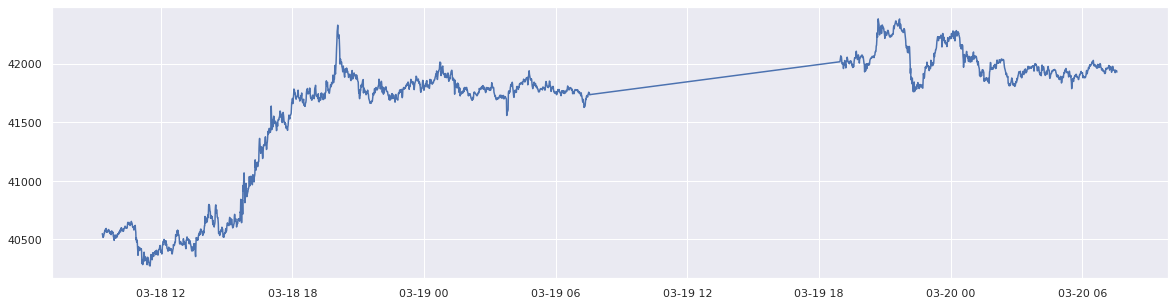

In [ ]:
# Example Bitcoin
plt.plot(df['Timestamp'], df['BTC'])
plt.show()

# 03 - Prepare data

In [ ]:
def prepare_data(df):
  price_cols = [col for col in df.columns[1:] if "_VOL24" not in col]
  vol_cols = [col for col in df.columns[1:] if "_VOL24" in col]
  
  # Ensure we have data with equally separated intervals
  df = df.set_index('Timestamp').resample('45s').mean().dropna()

  # Stack
  df_prices = df[price_cols].stack().reset_index().rename(columns={'level_1':'Crypto', 0:'Price'})
  df_vol = df[vol_cols].stack().reset_index().rename(columns={'level_1':'Crypto', 0:'Vol24h'})
  df_vol['Crypto'] = [crypto_i.split("_")[0] for crypto_i in df_vol['Crypto']]

  # Get both prices and volumes together
  df = pd.merge(df_prices, df_vol, how='left', on=['Timestamp', 'Crypto']).reset_index(drop=True)
  del df_prices, df_vol 

  return df

In [ ]:
df = prepare_data(df)
df

Timestamp Crypto         Price        Vol24h
0     2022-03-18 09:19:30    BTC  40549.971253  3.662266e+09
1     2022-03-18 09:19:30    ETH   2803.589503  3.608459e+09
2     2022-03-18 09:19:30    BNB    387.411775  3.388266e+08
3     2022-03-18 09:19:30   LUNA     83.376470  7.104783e+08
4     2022-03-18 09:19:30    XRP      0.785183  3.462047e+08
...                   ...    ...           ...           ...
27595 2022-03-20 07:33:45    ADA      0.903973  3.083694e+08
27596 2022-03-20 07:33:45    SOL     91.299298  5.352882e+08
27597 2022-03-20 07:33:45   AVAX     89.254300  6.056923e+08
27598 2022-03-20 07:33:45    DOT     19.321665  2.299840e+08
27599 2022-03-20 07:33:45   DOGE      0.122672  1.999713e+08

[27600 rows x 4 columns]

# 04 - Create Variables

In [ ]:
crypto_list = list(df['Crypto'].unique())
crypto_list

['BTC', 'ETH', 'BNB', 'LUNA', 'XRP', 'ADA', 'SOL', 'AVAX', 'DOT', 'DOGE']

In [ ]:
# Install talib (can take 2-3 min)
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar xvzf ta-lib-0.4.0-src.tar.gz
import os
os.chdir('ta-lib') # Can't use !cd in co-lab
!./configure --prefix=/usr
!make
!make install
os.chdir('../')
!pip install TA-Lib

--2022-03-20 09:04:49--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2022-03-20 09:04:49--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://phoenixnap.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2022-03-20 09:04:49--  http://phoenixnap.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving phoenixna

In [ ]:
import talib

## 04_01 - Trend Variables
Owner: Cristina https://github.com/CCienfu

### 04_01_01 - SMA 

A simple moving average (SMA) calculates the average of a selected range of prices, usually closing prices, by the number of periods in that range.

Pongo de ejemplo perido 10 y 50 pero habria que escoger los mejores para modelo predictivo

In [ ]:
# Using TA-LIB
for crypto_i in crypto_list:
  filter_crypto_i = df['Crypto']==crypto_i
  df.loc[filter_crypto_i, 'SMA10'] = talib.SMA(df.loc[filter_crypto_i, 'Price'], 10)
  df.loc[filter_crypto_i, 'SMA50'] = talib.SMA(df.loc[filter_crypto_i, 'Price'], 50)
  df.loc[filter_crypto_i, 'SMA100'] = talib.SMA(df.loc[filter_crypto_i, 'Price'], 100)
df.tail()

Timestamp Crypto      Price        Vol24h      SMA10  \
27595 2022-03-20 07:33:45    ADA   0.903973  3.083694e+08   0.903886   
27596 2022-03-20 07:33:45    SOL  91.299298  5.352882e+08  91.283008   
27597 2022-03-20 07:33:45   AVAX  89.254300  6.056923e+08  89.156357   
27598 2022-03-20 07:33:45    DOT  19.321665  2.299840e+08  19.333962   
27599 2022-03-20 07:33:45   DOGE   0.122672  1.999713e+08   0.122657   

           SMA50     SMA100  
27595   0.903641   0.906283  
27596  91.186445  91.282237  
27597  89.060006  89.142201  
27598  19.332333  19.342120  
27599   0.122632   0.122722

### 04_01_02 - EMA
A simple moving average can be enhanced as an exponential moving average (EMA) that is more heavily weighted on recent price action.

The major difference between an exponential moving average (EMA) and a simple moving average is the sensitivity each one shows to changes in the data used in its calculation. More specifically, the EMA gives a higher weighting to recent prices, while the SMA assigns an equal weighting to all values.

In [ ]:
for crypto_i in crypto_list:
  filter_crypto_i = df['Crypto']==crypto_i
  df.loc[filter_crypto_i, 'EMA10'] = talib.EMA(df.loc[filter_crypto_i, 'Price'], 10)
  df.loc[filter_crypto_i, 'EMA50'] = talib.EMA(df.loc[filter_crypto_i, 'Price'], 50)
  df.loc[filter_crypto_i, 'EMA100'] = talib.EMA(df.loc[filter_crypto_i, 'Price'], 100)
df.tail()

Timestamp Crypto      Price        Vol24h      SMA10  \
27595 2022-03-20 07:33:45    ADA   0.903973  3.083694e+08   0.903886   
27596 2022-03-20 07:33:45    SOL  91.299298  5.352882e+08  91.283008   
27597 2022-03-20 07:33:45   AVAX  89.254300  6.056923e+08  89.156357   
27598 2022-03-20 07:33:45    DOT  19.321665  2.299840e+08  19.333962   
27599 2022-03-20 07:33:45   DOGE   0.122672  1.999713e+08   0.122657   

           SMA50     SMA100      EMA10      EMA50     EMA100  
27595   0.903641   0.906283   0.903869   0.904178   0.904776  
27596  91.186445  91.282237  91.282095  91.229396  91.219884  
27597  89.060006  89.142201  89.168108  89.094541  89.056072  
27598  19.332333  19.342120  19.333906  19.334274  19.327434  
27599   0.122632   0.122722   0.122650   0.122647   0.122651

### 04_01_03 - Plot

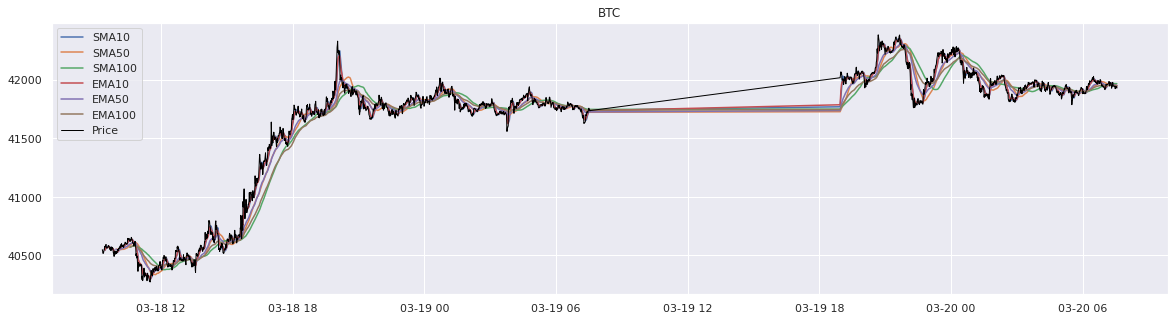

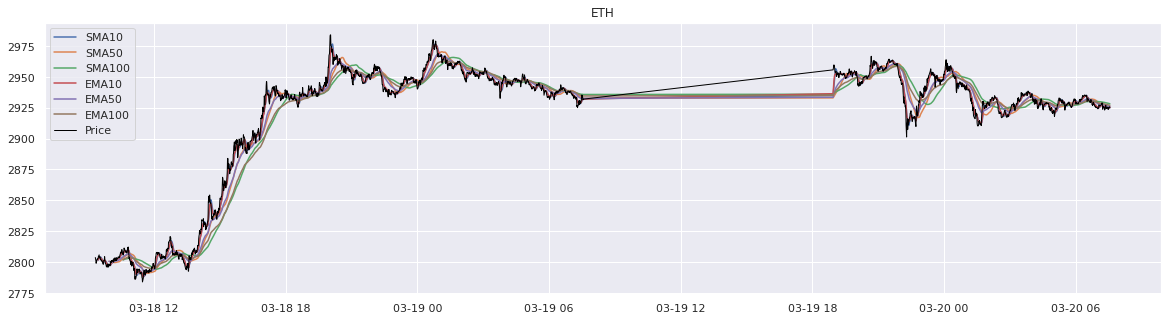

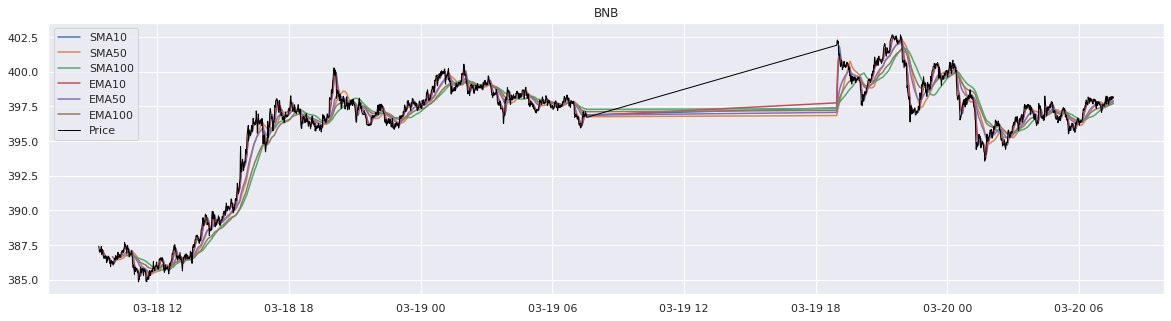

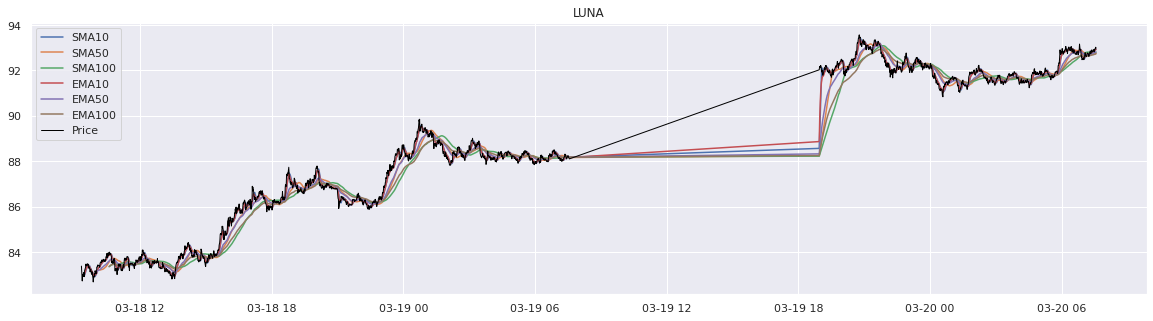

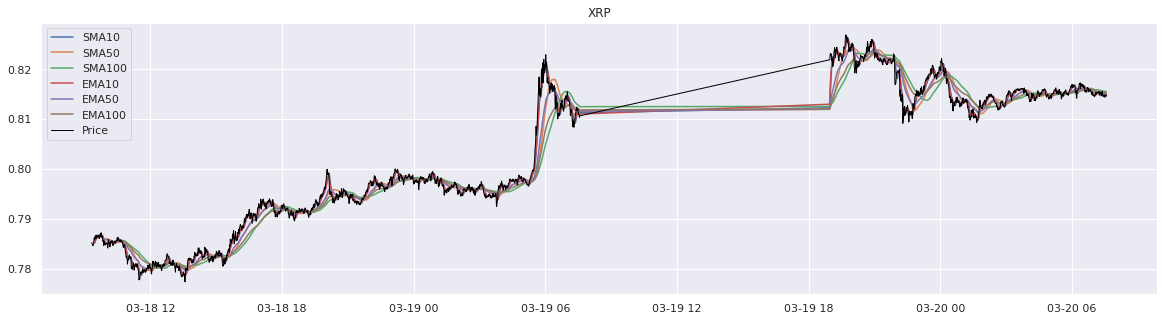

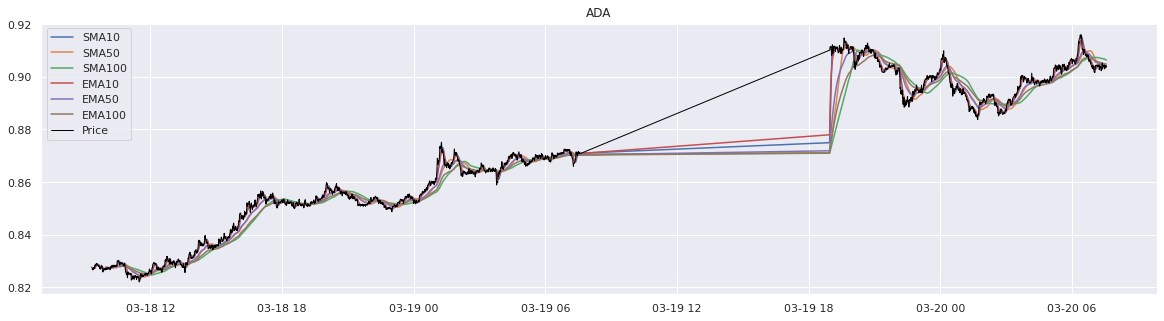

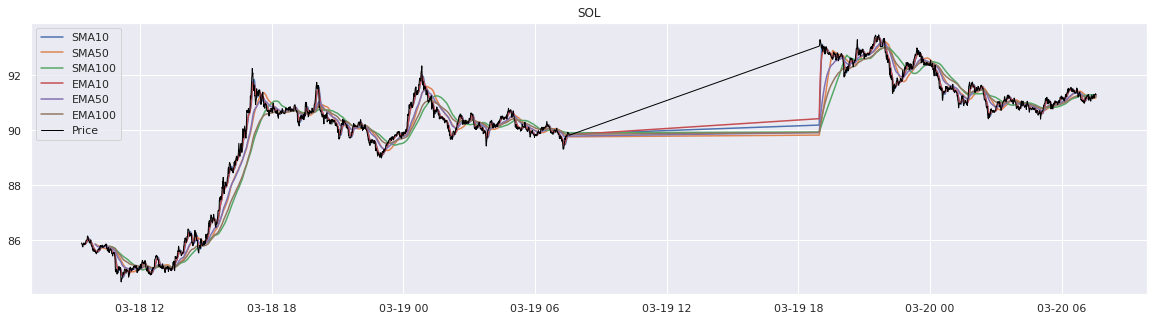

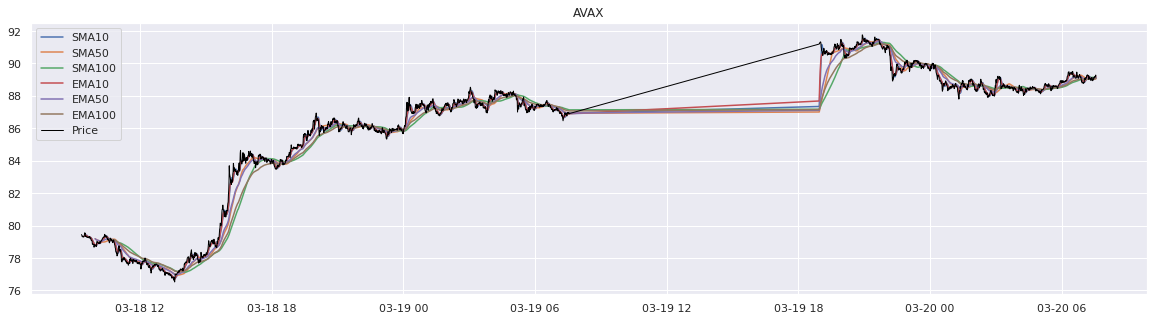

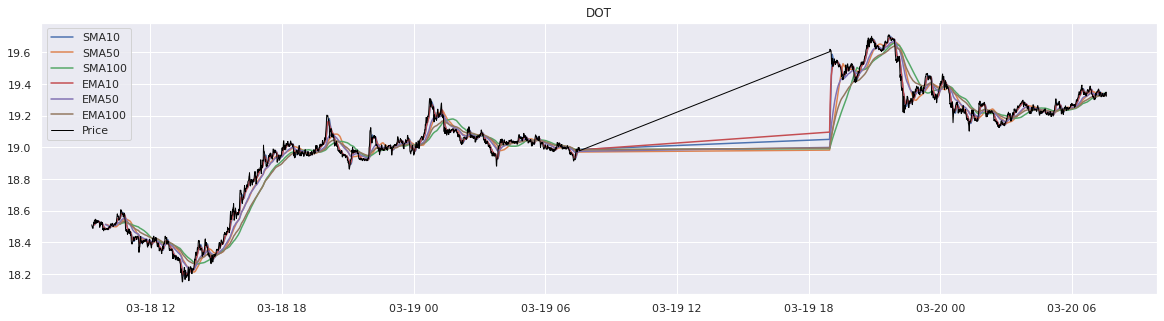

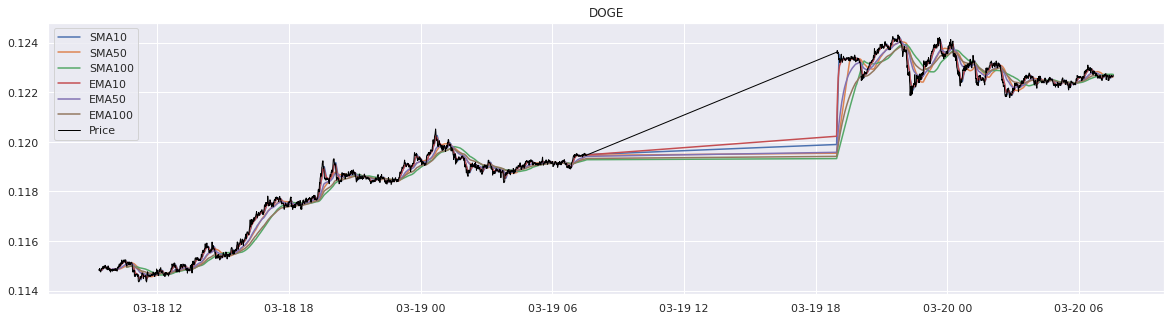

In [ ]:
sma_cols = [col for col in df.columns if "SMA" in col]
ema_cols = [col for col in df.columns if "EMA" in col]
for crypto_i in crypto_list:
  filter_crypto_i = df['Crypto']==crypto_i
  for col in sma_cols + ema_cols:
    plt.plot(df.loc[filter_crypto_i, 'Timestamp'], df.loc[filter_crypto_i, col], label=col)
  plt.plot(df.loc[filter_crypto_i, 'Timestamp'], df.loc[filter_crypto_i, 'Price'], linewidth=1, color='black', label='Price')
  plt.title(crypto_i)
  plt.legend()
  plt.show()

## 04_02 - Volume Variables
Owners: 
- Álvaro Cascón https://github.com/alvarocascon
- Álvaro Forner https://github.com/alvaroforner

### 04_02_01 - Delta Volume
Create a variable that takes evolution of Vol24h into account to assess latest volume changes (over last 7.5 mins).

In [ ]:
# Create DeltaVol24h
for crypto_i in crypto_list:
    filter_crypto_i = df['Crypto']==crypto_i
    df.loc[filter_crypto_i, 'DeltaVol24h'] = df.loc[filter_crypto_i, 'Vol24h'] - df.loc[filter_crypto_i, 'Vol24h'].shift(1)
    df.loc[((filter_crypto_i)&(df['DeltaVol24h']<0)), 'DeltaVol24h'] = np.NaN
    df.loc[filter_crypto_i, 'DeltaVol24h'] = df.loc[filter_crypto_i, 'DeltaVol24h'].rolling(10, min_periods=1).median()

df.tail(20)

Timestamp Crypto         Price        Vol24h         SMA10  \
27580 2022-03-20 07:33:00    BTC  41939.696080  2.743292e+09  41938.651927   
27581 2022-03-20 07:33:00    ETH   2925.769156  2.308766e+09   2924.945260   
27582 2022-03-20 07:33:00    BNB    398.145146  3.134867e+08    398.122219   
27583 2022-03-20 07:33:00   LUNA     93.015722  7.374882e+08     92.913035   
27584 2022-03-20 07:33:00    XRP      0.814790  2.872229e+08      0.814632   
27585 2022-03-20 07:33:00    ADA      0.903684  3.080902e+08      0.903919   
27586 2022-03-20 07:33:00    SOL     91.320368  5.353514e+08     91.276930   
27587 2022-03-20 07:33:00   AVAX     89.274143  6.056883e+08     89.130592   
27588 2022-03-20 07:33:00    DOT     19.348154  2.300421e+08     19.333904   
27589 2022-03-20 07:33:00   DOGE      0.122659  1.999411e+08      0.122649   
27590 2022-03-20 07:33:45    BTC  41926.893479  2.743171e+09  41936.973737   
27591 2022-03-20 07:33:45    ETH   2925.098851  2.309213e+09   2924.941400   
27592 2022-03-20 07:33:45    BNB    398.137323  3.135122e+08    398.119371   
27593 2022-03-20 07:33:45   LUNA     92.974763  7.373070e+08     92.925850   
27594 2022-03-20 07:33:45    XRP      0.814508  2.873614e+08      0.814639   
27595 2022-03-20 07:33:45    ADA      0.903973  3.083694e+08      0.903886   
27596 2022-03-20 07:33:45    SOL     91.299298  5.352882e+08     91.283008   
27597 2022-03-20 07:33:45   AVAX     89.254300  6.056923e+08     89.156357   
27598 2022-03-20 07:33:45    DOT     19.321665  2.299840e+08     19.333962   
27599 2022-03-20 07:33:45   DOGE      0.122672  1.999713e+08      0.122657   

              SMA50        SMA100         EMA10         EMA50        EMA100  \
27580  41948.942450  41965.170750  41939.886827  41950.470928  41949.903348   
27581   2925.623844   2928.314231   2925.065228   2925.959530   2927.068392   
27582    397.807431    397.821583    398.105339    397.896623    397.694488   
27583     92.735951     92.792443     92.919406     92.802302     92.723912   
27584      0.814896      0.815464      0.814693      0.814964      0.815192   
27585      0.903629      0.906377      0.903845      0.904186      0.904792   
27586     91.181563     91.284372     91.278272     91.226543     91.218280   
27587     89.051098     89.144093     89.148954     89.088020     89.052067   
27588     19.332274     19.342271     19.336626     19.334789     19.327551   
27589      0.122630      0.122724      0.122646      0.122646      0.122650   
27590  41948.776077  41964.855932  41937.524400  41949.546322  41949.447708   
27591   2925.626767   2928.228850   2925.071341   2925.925778   2927.029391   
27592    397.818214    397.825273    398.111154    397.906062    397.703257   
27593     92.745566     92.792396     92.929471     92.809065     92.728879   
27594      0.814892      0.815449      0.814660      0.814946      0.815178   
27595      0.903641      0.906283      0.903869      0.904178      0.904776   
27596     91.186445     91.282237     91.282095     91.229396     91.219884   
27597     89.060006     89.142201     89.168108     89.094541     89.056072   
27598     19.332333     19.342120     19.333906     19.334274     19.327434   
27599      0.122632      0.122722      0.122650      0.122647      0.122651   

         DeltaVol24h  
27580  332534.656675  
27581  521742.871902  
27582   83182.636461  
27583  130416.859066  
27584   63226.197485  
27585  194315.440295  
27586  203454.216471  
27587  367631.895581  
27588   62655.601207  
27589   14578.662432  
27590  338407.472297  
27591  472157.019144  
27592   52790.250265  
27593  153213.310251  
27594   68713.088957  
27595  206329.860362  
27596  189277.904553  
27597  279379.488884  
27598   66572.496169  
27599   30191.934071

### 04_02_02 Volume Trend and Momentum

In [ ]:
# Example
for crypto_i in crypto_list:
  filter_crypto_i = df['Crypto']==crypto_i
  df.loc[filter_crypto_i, 'DeltaVol>EMA20'] = (df.loc[filter_crypto_i, 'DeltaVol24h']>talib.EMA(df.loc[filter_crypto_i, 'DeltaVol24h'], 20)).astype(int)
  df.loc[filter_crypto_i, 'DeltaVol>90roll200'] = (df.loc[filter_crypto_i, 'DeltaVol24h']>df.loc[filter_crypto_i, 'DeltaVol24h'].rolling(200,min_periods=1).quantile(0.90)).astype(int)
df.tail()

Timestamp Crypto      Price        Vol24h      SMA10  \
27595 2022-03-20 07:33:45    ADA   0.903973  3.083694e+08   0.903886   
27596 2022-03-20 07:33:45    SOL  91.299298  5.352882e+08  91.283008   
27597 2022-03-20 07:33:45   AVAX  89.254300  6.056923e+08  89.156357   
27598 2022-03-20 07:33:45    DOT  19.321665  2.299840e+08  19.333962   
27599 2022-03-20 07:33:45   DOGE   0.122672  1.999713e+08   0.122657   

           SMA50     SMA100      EMA10      EMA50     EMA100    DeltaVol24h  \
27595   0.903641   0.906283   0.903869   0.904178   0.904776  206329.860362   
27596  91.186445  91.282237  91.282095  91.229396  91.219884  189277.904553   
27597  89.060006  89.142201  89.168108  89.094541  89.056072  279379.488884   
27598  19.332333  19.342120  19.333906  19.334274  19.327434   66572.496169   
27599   0.122632   0.122722   0.122650   0.122647   0.122651   30191.934071   

       DeltaVol>EMA20  DeltaVol>90roll200  
27595             1.0                 0.0  
27596             0.0                 0.0  
27597             0.0                 0.0  
27598             0.0                 0.0  
27599             0.0                 0.0

### 04_02_03 - Plot
Compare volumen last 24h versus the delta variable we create.

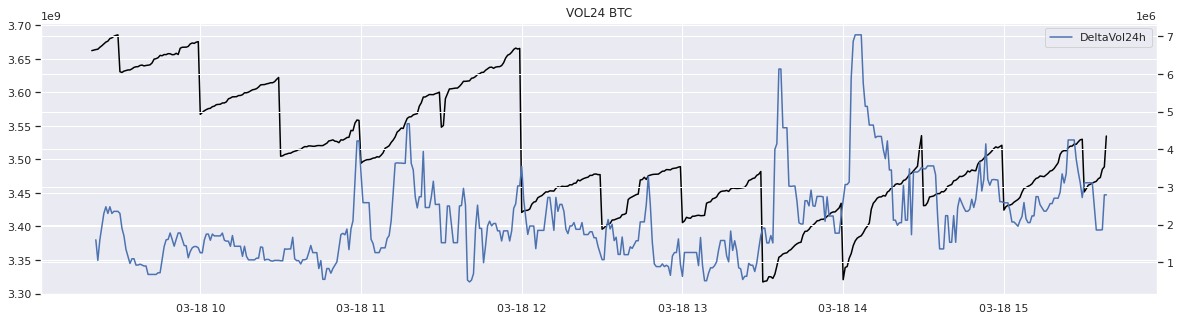

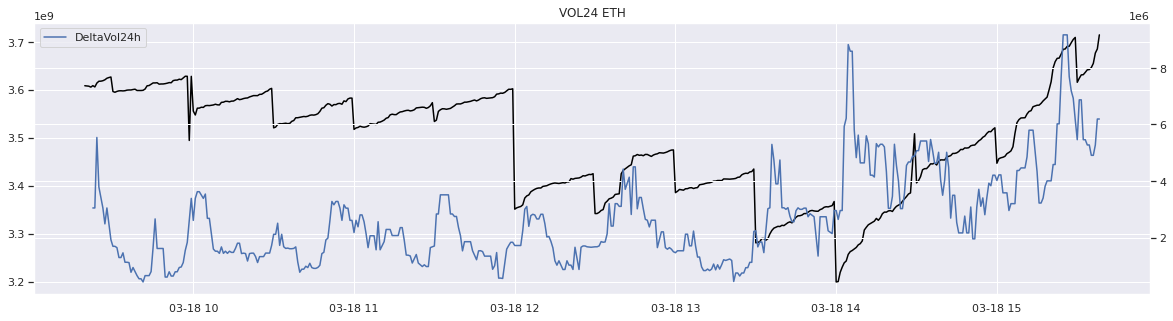

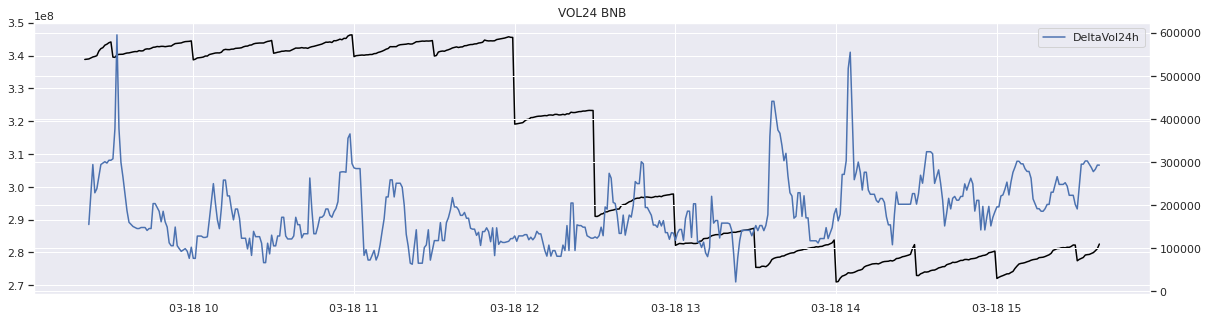

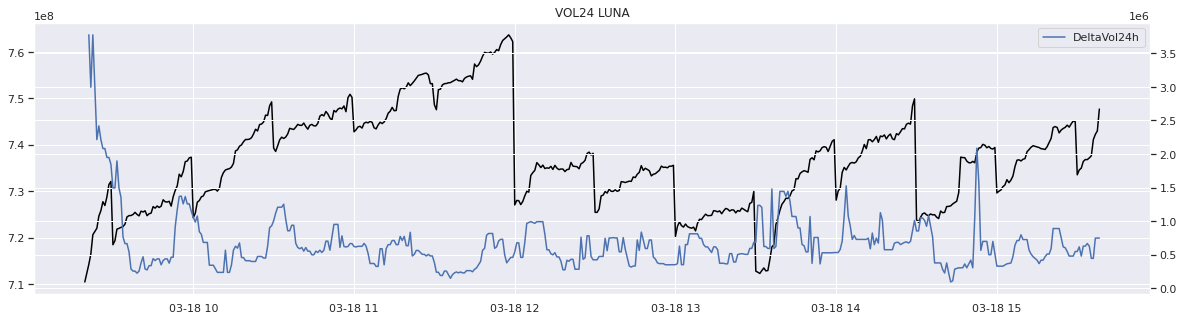

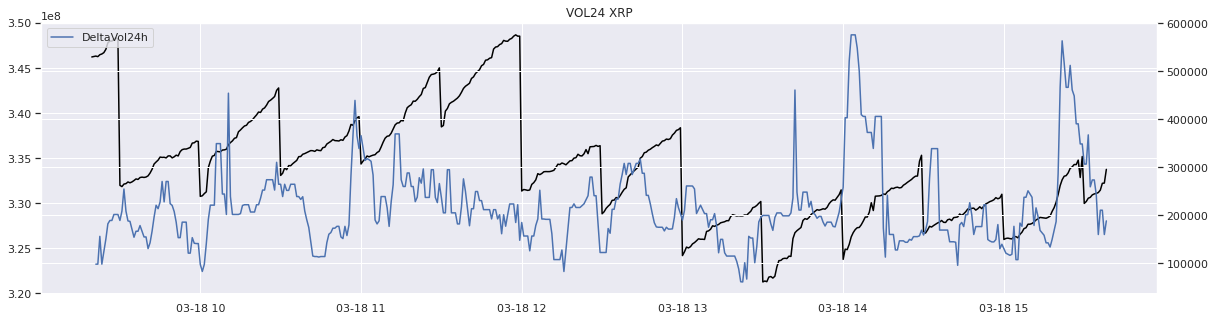

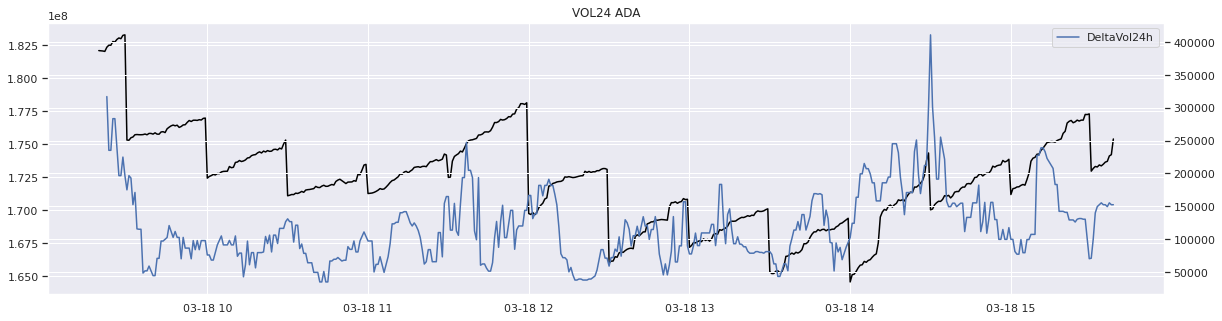

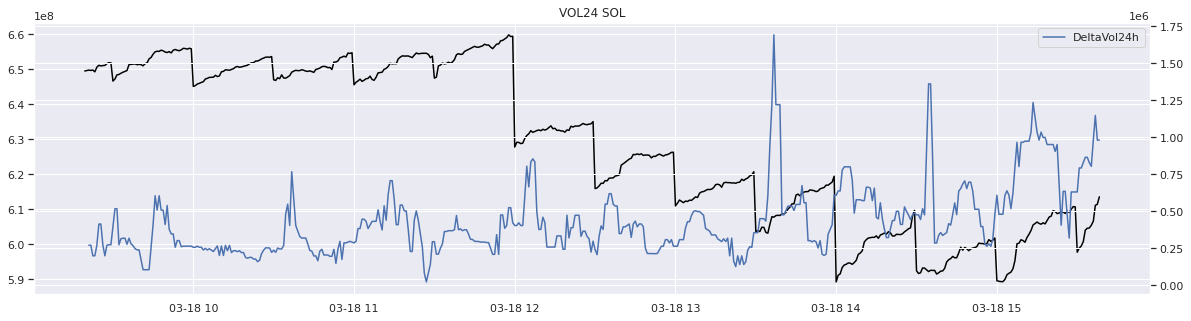

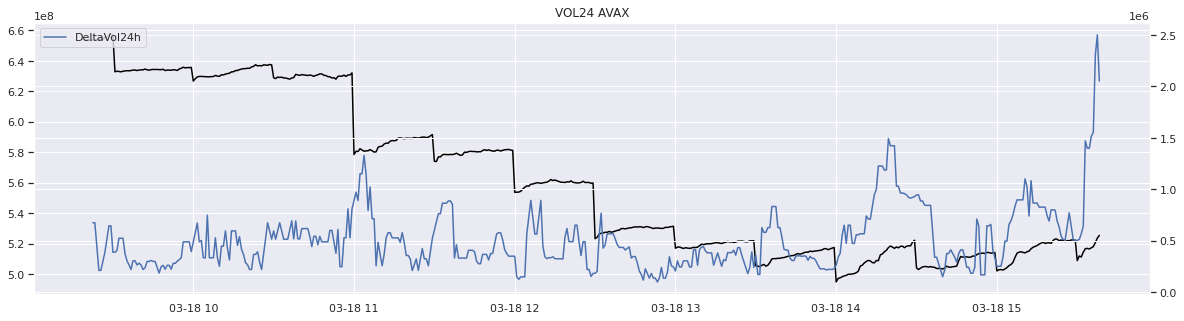

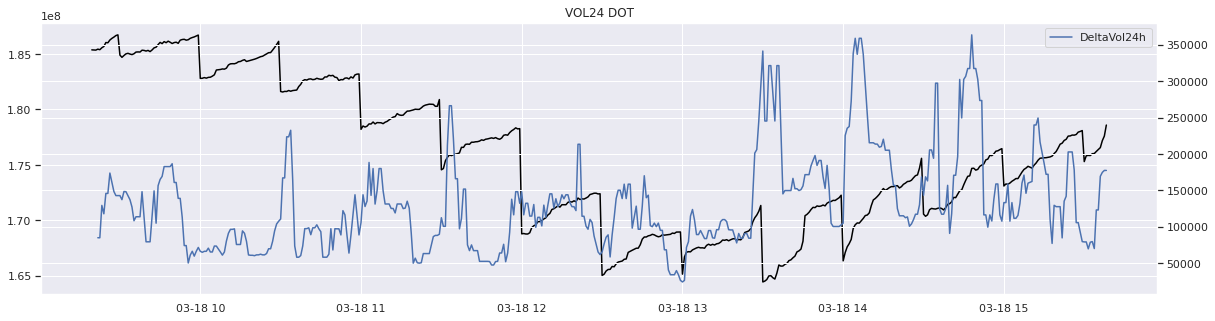

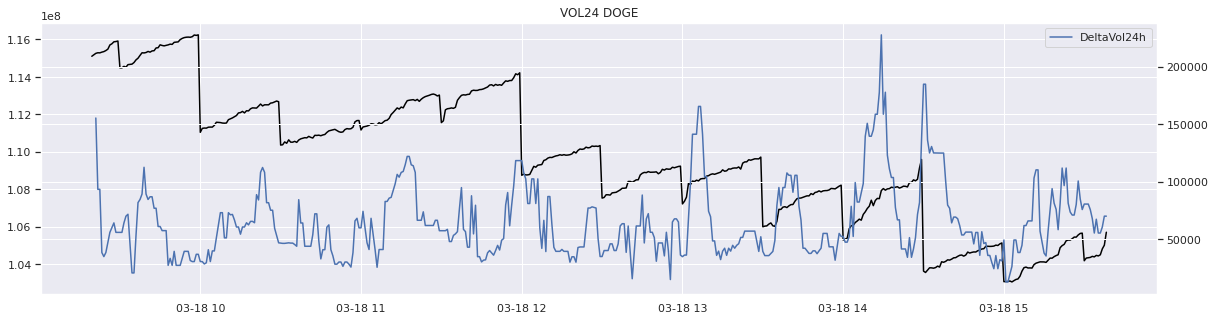

In [ ]:
# Original volume variable vs delta
for crypto_i in crypto_list:
  filter_crypto_i = df['Crypto']==crypto_i
  fig, ax1 = plt.subplots()
  ax2 = ax1.twinx()
  ax1.plot(df.loc[filter_crypto_i, 'Timestamp'].iloc[:500], df.loc[filter_crypto_i, 'Vol24h'].iloc[:500], label='Vol24h', color='black')
  ax2.plot(df.loc[filter_crypto_i, 'Timestamp'].iloc[:500], df.loc[filter_crypto_i, 'DeltaVol24h'].iloc[:500], label='DeltaVol24h')
  plt.title("VOL24 " + crypto_i)
  plt.legend()
  plt.show()

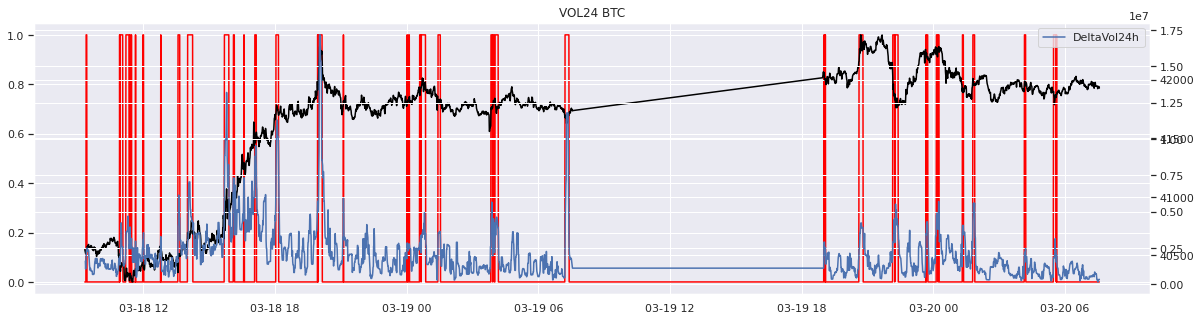

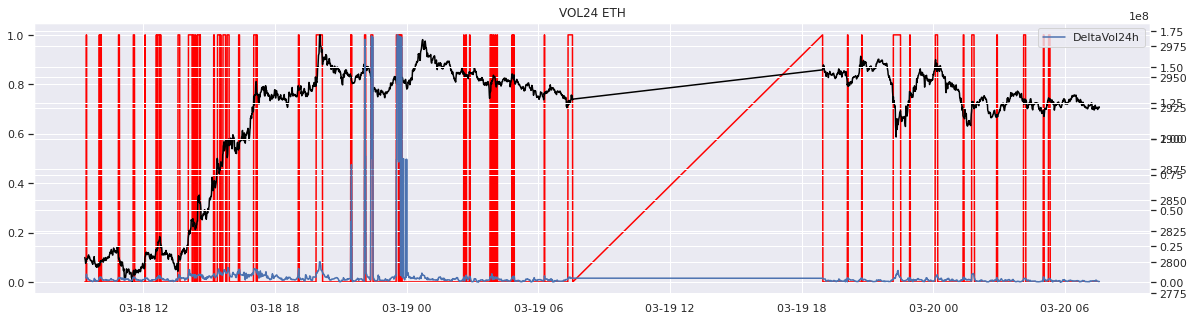

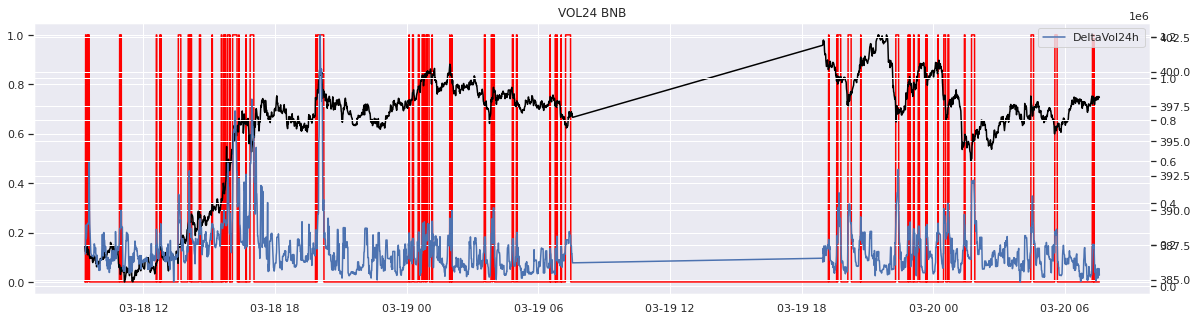

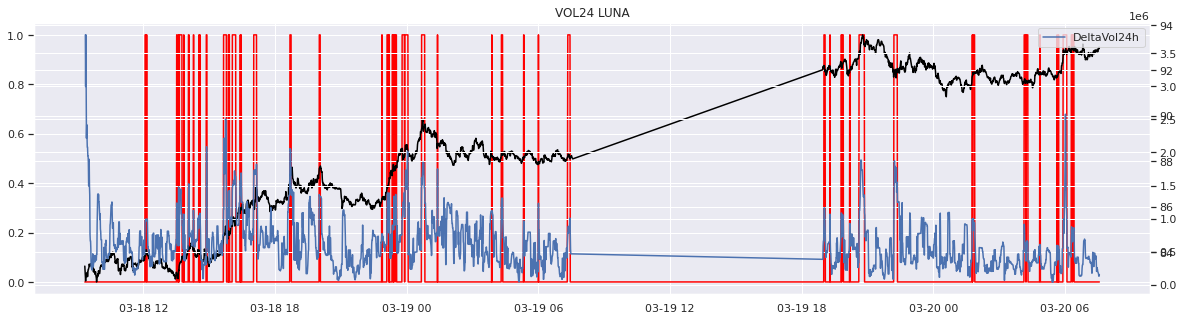

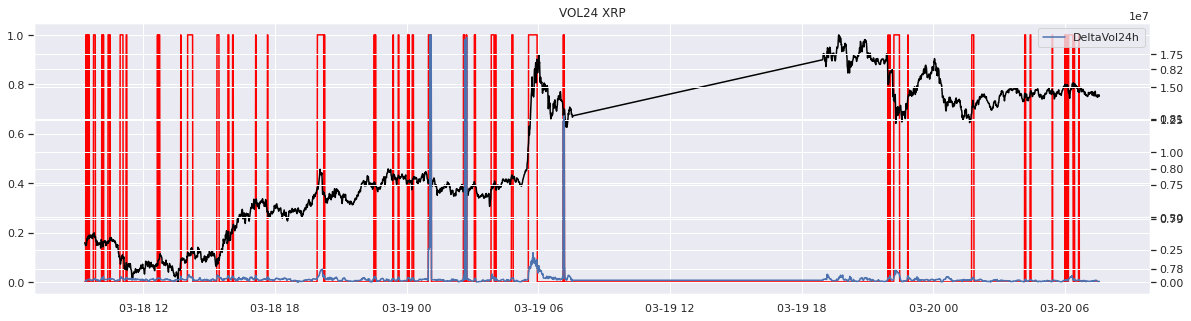

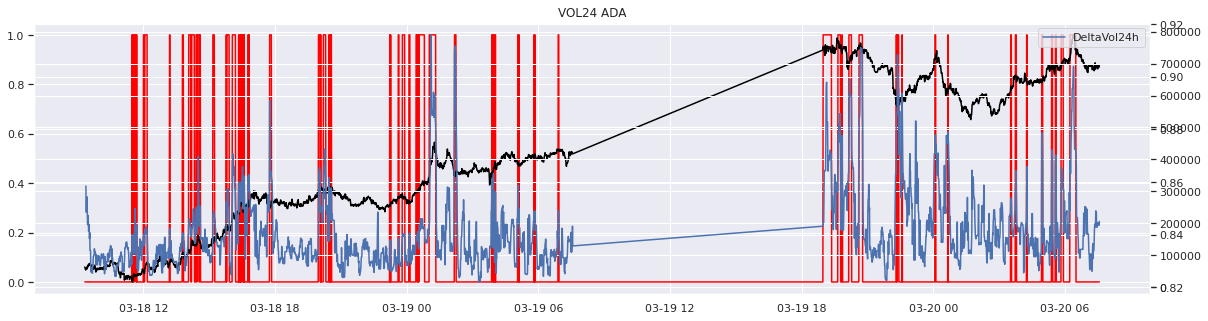

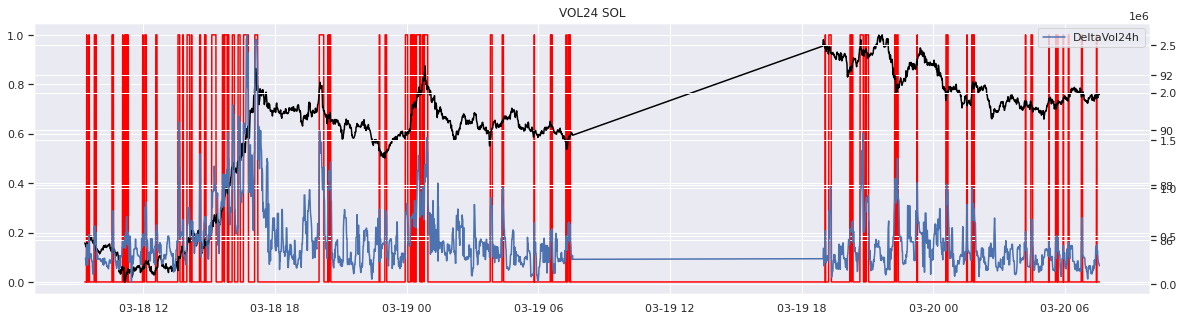

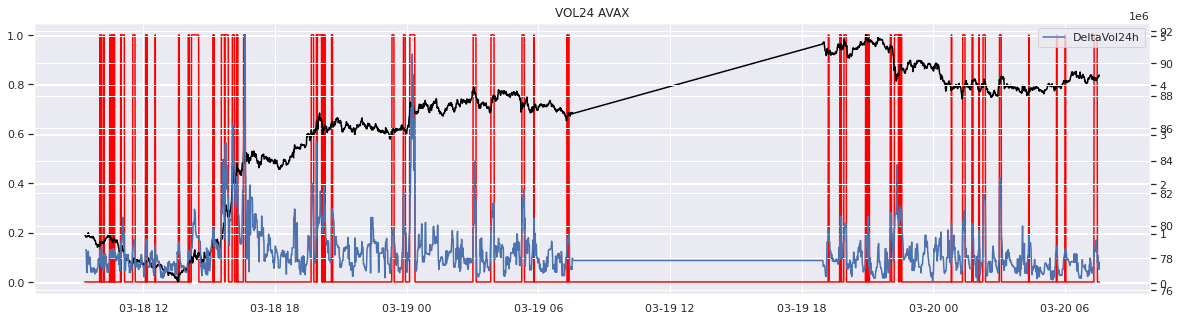

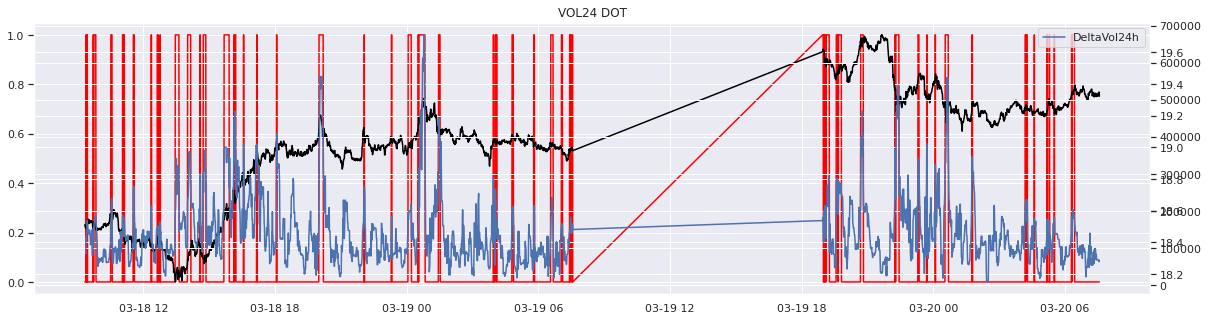

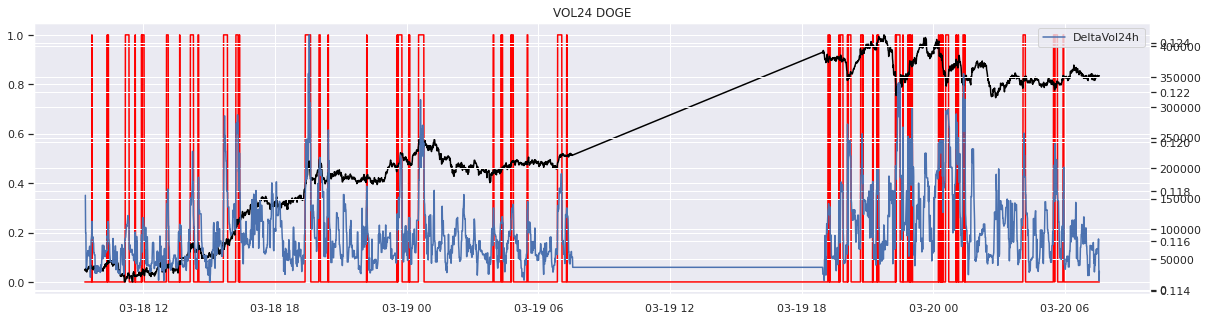

In [ ]:
# Volume Value vs price
for crypto_i in crypto_list:
  filter_crypto_i = df['Crypto']==crypto_i
  fig, ax1 = plt.subplots()
  ax2 = ax1.twinx()
  ax3 = ax1.twinx()
  ax1.plot(df.loc[filter_crypto_i, 'Timestamp'], df.loc[filter_crypto_i, 'DeltaVol>90roll200'], label='DeltaVol>90roll200', color = 'red')
  ax2.plot(df.loc[filter_crypto_i, 'Timestamp'], df.loc[filter_crypto_i, 'Price'], label='Price', color='black')
  ax3.plot(df.loc[filter_crypto_i, 'Timestamp'], df.loc[filter_crypto_i, 'DeltaVol24h'], label='DeltaVol24h')
  plt.title("VOL24 " + crypto_i)
  plt.legend()
  plt.show()

## 04_03 - Momentum Variables
Owner: Salvador https://github.com/gitsalva

### 04_03_01 - ROC
Rate of Change (ROC): momentum-based technical indicator that measures the percentage change in price between the current price and the price a certain number of periods ago.

https://www.investopedia.com/terms/r/rateofchange.asp


In [ ]:
# Create ROC
period_roc = 50
for crypto_i in crypto_list:
    filter_crypto_i = df['Crypto']==crypto_i
    df.loc[filter_crypto_i, 'ROC'+str(period_roc)] = talib.ROC(df.loc[filter_crypto_i, 'Price'], period_roc)

df.tail()

Timestamp Crypto      Price        Vol24h      SMA10  \
27595 2022-03-20 07:33:45    ADA   0.903973  3.083694e+08   0.903886   
27596 2022-03-20 07:33:45    SOL  91.299298  5.352882e+08  91.283008   
27597 2022-03-20 07:33:45   AVAX  89.254300  6.056923e+08  89.156357   
27598 2022-03-20 07:33:45    DOT  19.321665  2.299840e+08  19.333962   
27599 2022-03-20 07:33:45   DOGE   0.122672  1.999713e+08   0.122657   

           SMA50     SMA100      EMA10      EMA50     EMA100    DeltaVol24h  \
27595   0.903641   0.906283   0.903869   0.904178   0.904776  206329.860362   
27596  91.186445  91.282237  91.282095  91.229396  91.219884  189277.904553   
27597  89.060006  89.142201  89.168108  89.094541  89.056072  279379.488884   
27598  19.332333  19.342120  19.333906  19.334274  19.327434   66572.496169   
27599   0.122632   0.122722   0.122650   0.122647   0.122651   30191.934071   

       DeltaVol>EMA20  DeltaVol>90roll200     ROC50  
27595             1.0                 0.0  0.068697  
27596             0.0                 0.0  0.268067  
27597             0.0                 0.0  0.501514  
27598             0.0                 0.0  0.015120  
27599             0.0                 0.0  0.084829

### 04_03_02 - MOM
The momentum oscillator measures the amount that a security has changed in a certain period over a certain period. 

In [ ]:
# Create MOM
period_mom = 50
for crypto_i in crypto_list:
    filter_crypto_i = df['Crypto']==crypto_i
    df.loc[filter_crypto_i, 'MOM'+str(period_mom)] = talib.MOM(df.loc[filter_crypto_i, 'Price'], period_mom)

df.tail()

Timestamp Crypto      Price        Vol24h      SMA10  \
27595 2022-03-20 07:33:45    ADA   0.903973  3.083694e+08   0.903886   
27596 2022-03-20 07:33:45    SOL  91.299298  5.352882e+08  91.283008   
27597 2022-03-20 07:33:45   AVAX  89.254300  6.056923e+08  89.156357   
27598 2022-03-20 07:33:45    DOT  19.321665  2.299840e+08  19.333962   
27599 2022-03-20 07:33:45   DOGE   0.122672  1.999713e+08   0.122657   

           SMA50     SMA100      EMA10      EMA50     EMA100    DeltaVol24h  \
27595   0.903641   0.906283   0.903869   0.904178   0.904776  206329.860362   
27596  91.186445  91.282237  91.282095  91.229396  91.219884  189277.904553   
27597  89.060006  89.142201  89.168108  89.094541  89.056072  279379.488884   
27598  19.332333  19.342120  19.333906  19.334274  19.327434   66572.496169   
27599   0.122632   0.122722   0.122650   0.122647   0.122651   30191.934071   

       DeltaVol>EMA20  DeltaVol>90roll200     ROC50     MOM50  
27595             1.0                 0.0  0.068697  0.000621  
27596             0.0                 0.0  0.268067  0.244089  
27597             0.0                 0.0  0.501514  0.445389  
27598             0.0                 0.0  0.015120  0.002921  
27599             0.0                 0.0  0.084829  0.000104

### 04_03_03 - CMO
The formula calculates the difference between the sum of recent gains and the sum of recent losses and then divides the result by the sum of all price movements over the same period.

In [ ]:
# Create CMO
period_cmo = 100
for crypto_i in crypto_list:
    filter_crypto_i = df['Crypto']==crypto_i
    df.loc[filter_crypto_i, 'CMO'+str(period_cmo)] = talib.CMO(df.loc[filter_crypto_i, 'Price'], period_cmo)

df.tail()

Timestamp Crypto      Price        Vol24h      SMA10  \
27595 2022-03-20 07:33:45    ADA   0.903973  3.083694e+08   0.903886   
27596 2022-03-20 07:33:45    SOL  91.299298  5.352882e+08  91.283008   
27597 2022-03-20 07:33:45   AVAX  89.254300  6.056923e+08  89.156357   
27598 2022-03-20 07:33:45    DOT  19.321665  2.299840e+08  19.333962   
27599 2022-03-20 07:33:45   DOGE   0.122672  1.999713e+08   0.122657   

           SMA50     SMA100      EMA10      EMA50     EMA100    DeltaVol24h  \
27595   0.903641   0.906283   0.903869   0.904178   0.904776  206329.860362   
27596  91.186445  91.282237  91.282095  91.229396  91.219884  189277.904553   
27597  89.060006  89.142201  89.168108  89.094541  89.056072  279379.488884   
27598  19.332333  19.342120  19.333906  19.334274  19.327434   66572.496169   
27599   0.122632   0.122722   0.122650   0.122647   0.122651   30191.934071   

       DeltaVol>EMA20  DeltaVol>90roll200     ROC50     MOM50    CMO100  
27595             1.0                 0.0  0.068697  0.000621 -0.172907  
27596             0.0                 0.0  0.268067  0.244089  2.939891  
27597             0.0                 0.0  0.501514  0.445389  5.611917  
27598             0.0                 0.0  0.015120  0.002921  1.926484  
27599             0.0                 0.0  0.084829  0.000104  1.053007

### 04_03_04 - Buying Indicators

In [ ]:
# ROC
#Zero-line crossovers can be used to signal trend changes. 
df['ROCLowerThan0'] = (df['ROC'+str(period_roc)]<0).astype(int)
df['ROCHigherThan0'] = (df['ROC'+str(period_roc)]>0).astype(int)
df.tail()

Timestamp Crypto      Price        Vol24h      SMA10  \
27595 2022-03-20 07:33:45    ADA   0.903973  3.083694e+08   0.903886   
27596 2022-03-20 07:33:45    SOL  91.299298  5.352882e+08  91.283008   
27597 2022-03-20 07:33:45   AVAX  89.254300  6.056923e+08  89.156357   
27598 2022-03-20 07:33:45    DOT  19.321665  2.299840e+08  19.333962   
27599 2022-03-20 07:33:45   DOGE   0.122672  1.999713e+08   0.122657   

           SMA50     SMA100      EMA10      EMA50     EMA100    DeltaVol24h  \
27595   0.903641   0.906283   0.903869   0.904178   0.904776  206329.860362   
27596  91.186445  91.282237  91.282095  91.229396  91.219884  189277.904553   
27597  89.060006  89.142201  89.168108  89.094541  89.056072  279379.488884   
27598  19.332333  19.342120  19.333906  19.334274  19.327434   66572.496169   
27599   0.122632   0.122722   0.122650   0.122647   0.122651   30191.934071   

       DeltaVol>EMA20  DeltaVol>90roll200     ROC50     MOM50    CMO100  \
27595             1.0                 0.0  0.068697  0.000621 -0.172907   
27596             0.0                 0.0  0.268067  0.244089  2.939891   
27597             0.0                 0.0  0.501514  0.445389  5.611917   
27598             0.0                 0.0  0.015120  0.002921  1.926484   
27599             0.0                 0.0  0.084829  0.000104  1.053007   

       ROCLowerThan0  ROCHigherThan0  
27595              0               1  
27596              0               1  
27597              0               1  
27598              0               1  
27599              0               1

In [ ]:
# MOM 
#Crossing above the zero line during an uptrend would be a buy signal and a crossing below the 
#zero line during a downtrend would be a sell short signal.
df['MOMLowerThan0'] = (df['MOM'+str(period_mom)]<0).astype(int)
df['MOMHigherThan0'] = (df['MOM'+str(period_mom)]>0).astype(int)
df.tail()

Timestamp Crypto      Price        Vol24h      SMA10  \
27595 2022-03-20 07:33:45    ADA   0.903973  3.083694e+08   0.903886   
27596 2022-03-20 07:33:45    SOL  91.299298  5.352882e+08  91.283008   
27597 2022-03-20 07:33:45   AVAX  89.254300  6.056923e+08  89.156357   
27598 2022-03-20 07:33:45    DOT  19.321665  2.299840e+08  19.333962   
27599 2022-03-20 07:33:45   DOGE   0.122672  1.999713e+08   0.122657   

           SMA50     SMA100      EMA10      EMA50     EMA100    DeltaVol24h  \
27595   0.903641   0.906283   0.903869   0.904178   0.904776  206329.860362   
27596  91.186445  91.282237  91.282095  91.229396  91.219884  189277.904553   
27597  89.060006  89.142201  89.168108  89.094541  89.056072  279379.488884   
27598  19.332333  19.342120  19.333906  19.334274  19.327434   66572.496169   
27599   0.122632   0.122722   0.122650   0.122647   0.122651   30191.934071   

       DeltaVol>EMA20  DeltaVol>90roll200     ROC50     MOM50    CMO100  \
27595             1.0                 0.0  0.068697  0.000621 -0.172907   
27596             0.0                 0.0  0.268067  0.244089  2.939891   
27597             0.0                 0.0  0.501514  0.445389  5.611917   
27598             0.0                 0.0  0.015120  0.002921  1.926484   
27599             0.0                 0.0  0.084829  0.000104  1.053007   

       ROCLowerThan0  ROCHigherThan0  MOMLowerThan0  MOMHigherThan0  
27595              0               1              0               1  
27596              0               1              0               1  
27597              0               1              0               1  
27598              0               1              0               1  
27599              0               1              0               1

In [ ]:
# CMO 
#Buy under -50, sell above 50
df['CMOHigherThan50'] = (df['CMO'+str(period_cmo)]>50).astype(int)
df['CMOLowerThan50'] = (df['CMO'+str(period_cmo)]<50).astype(int)
df['CMOLowerThan-50'] = (df['CMO'+str(period_cmo)]<-50).astype(int)
df['CMOHigherThan-50'] = (df['CMO'+str(period_cmo)]>-50).astype(int)
df.tail()

Timestamp Crypto      Price        Vol24h      SMA10  \
27595 2022-03-20 07:33:45    ADA   0.903973  3.083694e+08   0.903886   
27596 2022-03-20 07:33:45    SOL  91.299298  5.352882e+08  91.283008   
27597 2022-03-20 07:33:45   AVAX  89.254300  6.056923e+08  89.156357   
27598 2022-03-20 07:33:45    DOT  19.321665  2.299840e+08  19.333962   
27599 2022-03-20 07:33:45   DOGE   0.122672  1.999713e+08   0.122657   

           SMA50     SMA100      EMA10      EMA50     EMA100  ...     MOM50  \
27595   0.903641   0.906283   0.903869   0.904178   0.904776  ...  0.000621   
27596  91.186445  91.282237  91.282095  91.229396  91.219884  ...  0.244089   
27597  89.060006  89.142201  89.168108  89.094541  89.056072  ...  0.445389   
27598  19.332333  19.342120  19.333906  19.334274  19.327434  ...  0.002921   
27599   0.122632   0.122722   0.122650   0.122647   0.122651  ...  0.000104   

         CMO100  ROCLowerThan0  ROCHigherThan0  MOMLowerThan0  MOMHigherThan0  \
27595 -0.172907              0               1              0               1   
27596  2.939891              0               1              0               1   
27597  5.611917              0               1              0               1   
27598  1.926484              0               1              0               1   
27599  1.053007              0               1              0               1   

       CMOHigherThan50  CMOLowerThan50  CMOLowerThan-50  CMOHigherThan-50  
27595                0               1                0                 1  
27596                0               1                0                 1  
27597                0               1                0                 1  
27598                0               1                0                 1  
27599                0               1                0                 1  

[5 rows x 24 columns]

### 04_04_05 - Plot

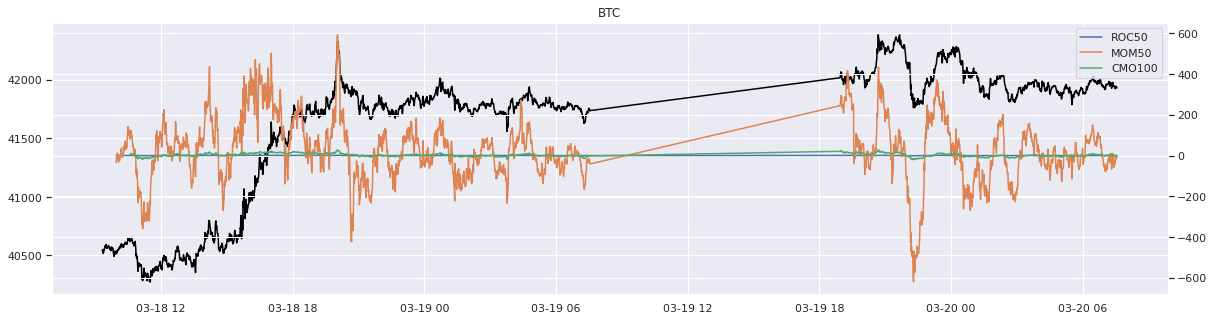

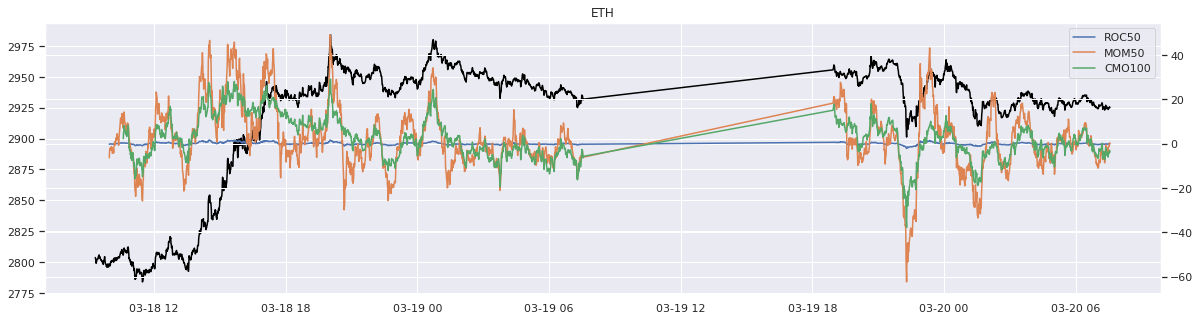

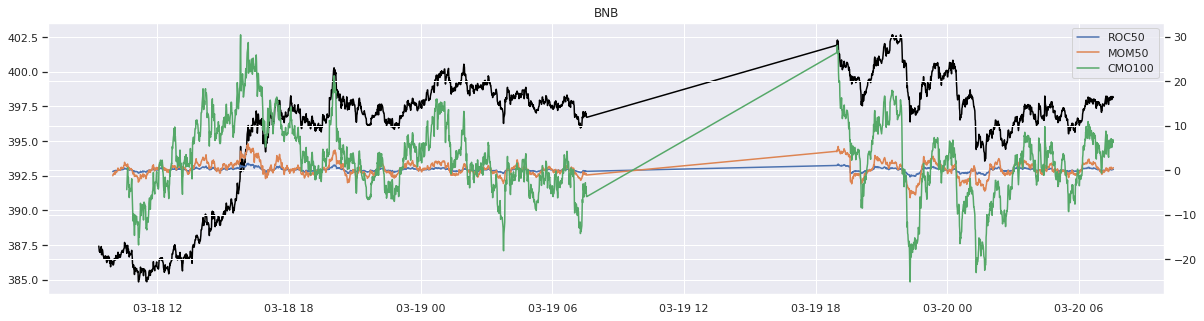

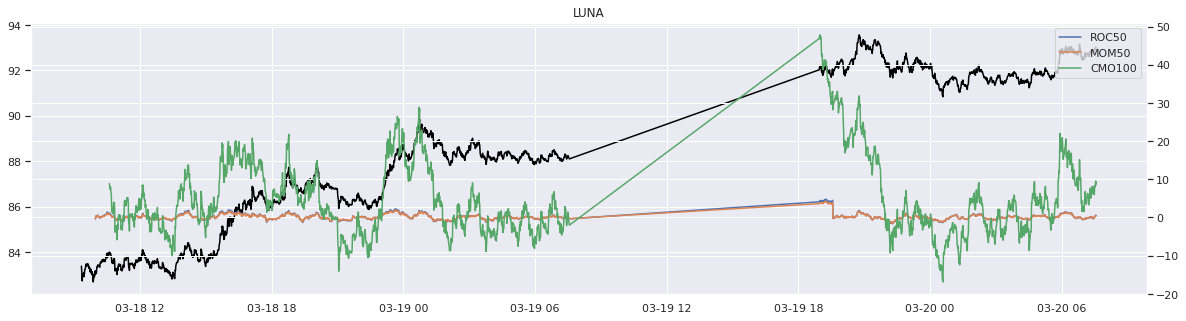

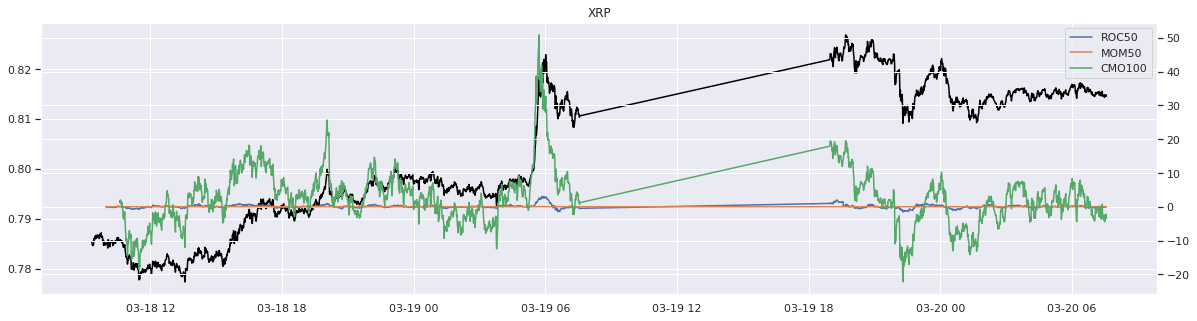

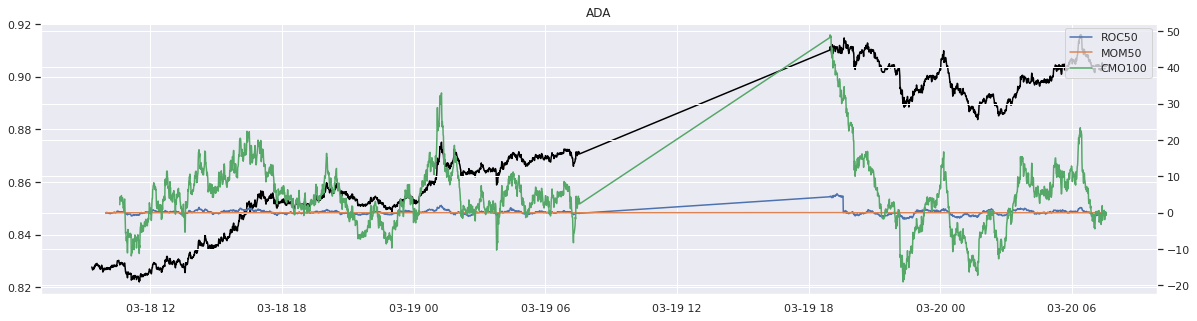

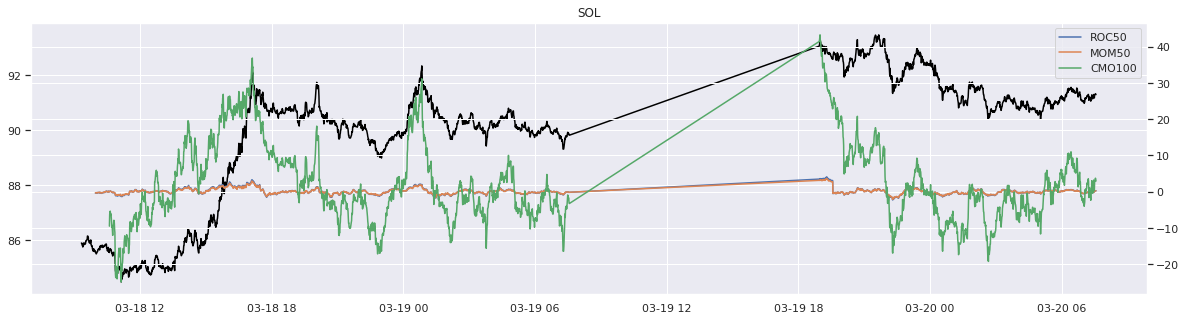

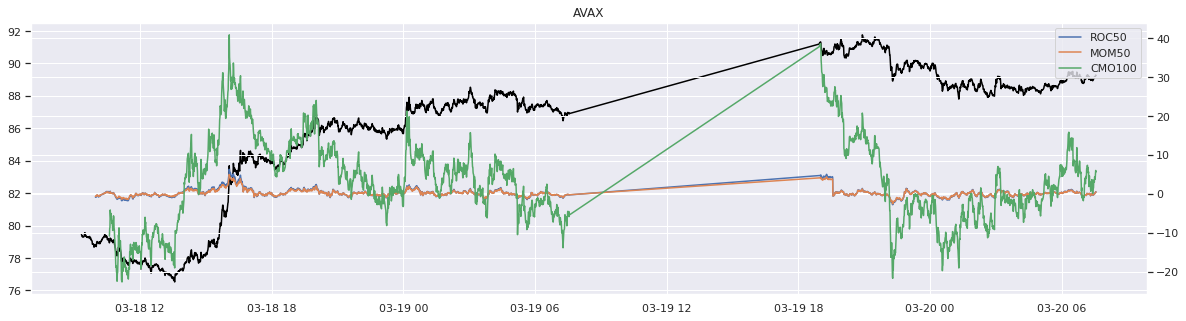

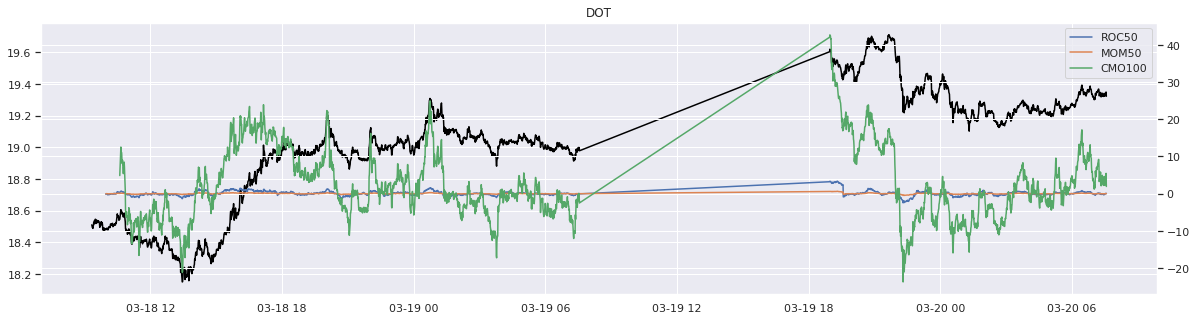

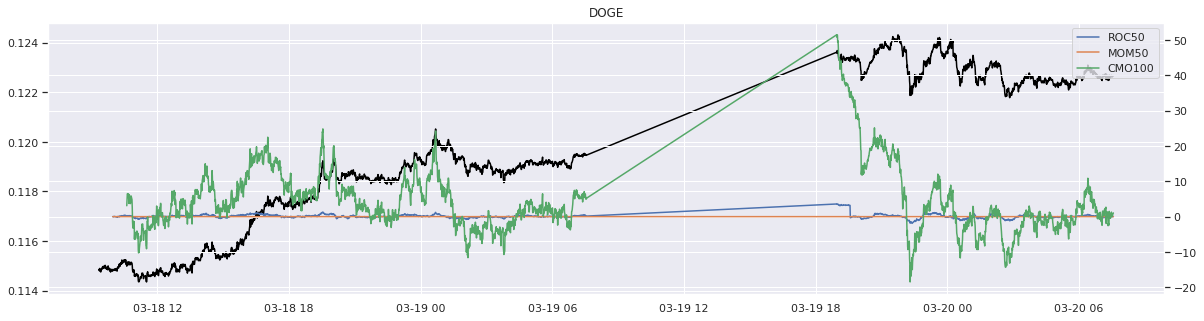

In [ ]:
roc_cols = [col for col in df.columns if (("ROC" in col)&(len(col)<10))]
mom_cols = [col for col in df.columns if (("MOM" in col)&(len(col)<10))]
cmo_cols = [col for col in df.columns if (("CMO" in col)&(len(col)<10))]
for crypto_i in crypto_list:
  filter_crypto_i = df['Crypto']==crypto_i
  fig, ax1 = plt.subplots()
  ax2 = ax1.twinx()
  for col in roc_cols + mom_cols + cmo_cols:
    plt.plot(df.loc[filter_crypto_i, 'Timestamp'], df.loc[filter_crypto_i, col], label=col)
  ax1.plot(df.loc[filter_crypto_i, 'Timestamp'], df.loc[filter_crypto_i, 'Price'], label='Price', color='black')
  plt.title(crypto_i)
  plt.legend()
  plt.show()

## 04_04 - Volatility Variables
Owner: Ángel https://github.com/PerezAng

### 04_04_01 - SHARPE Ratio
[Investopedia](https://www.investopedia.com/terms/s/sharperatio.asp#:~:text=The%20Sharpe%20ratio%20is%20calculated,of%20the%20portfolio's%20excess%20return.)


In [ ]:
rf = 0 # risk free rate
N = 100

def sharpe_ratio(return_series, N, rf):
    mean = return_series.mean() * N - rf
    sigma = return_series.std() * np.sqrt(N)
    return mean / sigma

In [ ]:
# Create SHARPE
for crypto_i in crypto_list:
    filter_crypto_i = df['Crypto']==crypto_i
    # Sharpe
    df.loc[filter_crypto_i, 'Sharpe'] = (
        (df.loc[filter_crypto_i, 'Price'].pct_change().rolling(N, min_periods=1).mean() * N - rf) / 
        (df.loc[filter_crypto_i, 'Price'].pct_change().rolling(N, min_periods=1).std() * np.sqrt(N))
    )
        
df.tail()

Timestamp Crypto      Price        Vol24h      SMA10  \
27595 2022-03-20 07:33:45    ADA   0.903973  3.083694e+08   0.903886   
27596 2022-03-20 07:33:45    SOL  91.299298  5.352882e+08  91.283008   
27597 2022-03-20 07:33:45   AVAX  89.254300  6.056923e+08  89.156357   
27598 2022-03-20 07:33:45    DOT  19.321665  2.299840e+08  19.333962   
27599 2022-03-20 07:33:45   DOGE   0.122672  1.999713e+08   0.122657   

           SMA50     SMA100      EMA10      EMA50     EMA100  ...    CMO100  \
27595   0.903641   0.906283   0.903869   0.904178   0.904776  ... -0.172907   
27596  91.186445  91.282237  91.282095  91.229396  91.219884  ...  2.939891   
27597  89.060006  89.142201  89.168108  89.094541  89.056072  ...  5.611917   
27598  19.332333  19.342120  19.333906  19.334274  19.327434  ...  1.926484   
27599   0.122632   0.122722   0.122650   0.122647   0.122651  ...  1.053007   

       ROCLowerThan0  ROCHigherThan0  MOMLowerThan0  MOMHigherThan0  \
27595              0               1              0               1   
27596              0               1              0               1   
27597              0               1              0               1   
27598              0               1              0               1   
27599              0               1              0               1   

       CMOHigherThan50  CMOLowerThan50  CMOLowerThan-50  CMOHigherThan-50  \
27595                0               1                0                 1   
27596                0               1                0                 1   
27597                0               1                0                 1   
27598                0               1                0                 1   
27599                0               1                0                 1   

         Sharpe  
27595 -1.103197  
27596 -0.402642  
27597 -0.227205  
27598 -0.139809  
27599 -0.278984  

[5 rows x 25 columns]

### 04_04_02 - Sortino Rate
[Investopedia](https://www.investopedia.com/terms/s/sortinoratio.asp)

In [ ]:
def sortino_ratio(series, N,rf):
    mean = series.mean() * N -rf
    std_neg = series[series<0].std()*np.sqrt(N)
    return mean/std_neg

In [ ]:
# Create SORTINO
for crypto_i in crypto_list:
    filter_crypto_i = df['Crypto']==crypto_i
    df.loc[filter_crypto_i, 'mean_sortino'] = (df.loc[filter_crypto_i, 'Price'].pct_change().rolling(N, min_periods=1).mean() * N - rf)
    df.loc[filter_crypto_i, 'std_neg'] = df.loc[filter_crypto_i, 'Price'].pct_change()
    df.loc[((filter_crypto_i)&(df['std_neg']>=0)), 'std_neg'] = np.NaN
    df.loc[filter_crypto_i, 'std_neg'] = df.loc[filter_crypto_i, 'std_neg'].rolling(N, min_periods=1).std() * np.sqrt(N)

# Sortino
df['Sortino'] = df['mean_sortino'] / df['std_neg']
df = df.drop(['mean_sortino', 'std_neg'], axis=1)
df.tail()

Timestamp Crypto      Price        Vol24h      SMA10  \
27595 2022-03-20 07:33:45    ADA   0.903973  3.083694e+08   0.903886   
27596 2022-03-20 07:33:45    SOL  91.299298  5.352882e+08  91.283008   
27597 2022-03-20 07:33:45   AVAX  89.254300  6.056923e+08  89.156357   
27598 2022-03-20 07:33:45    DOT  19.321665  2.299840e+08  19.333962   
27599 2022-03-20 07:33:45   DOGE   0.122672  1.999713e+08   0.122657   

           SMA50     SMA100      EMA10      EMA50     EMA100  ...  \
27595   0.903641   0.906283   0.903869   0.904178   0.904776  ...   
27596  91.186445  91.282237  91.282095  91.229396  91.219884  ...   
27597  89.060006  89.142201  89.168108  89.094541  89.056072  ...   
27598  19.332333  19.342120  19.333906  19.334274  19.327434  ...   
27599   0.122632   0.122722   0.122650   0.122647   0.122651  ...   

       ROCHigherThan0  MOMLowerThan0  MOMHigherThan0  CMOHigherThan50  \
27595               1              0               1                0   
27596               1              0               1                0   
27597               1              0               1                0   
27598               1              0               1                0   
27599               1              0               1                0   

       CMOLowerThan50  CMOLowerThan-50  CMOHigherThan-50    Sharpe   Sortino  \
27595               1                0                 1 -1.103197 -1.434583   
27596               1                0                 1 -0.402642 -0.543754   
27597               1                0                 1 -0.227205 -0.310252   
27598               1                0                 1 -0.139809 -0.203143   
27599               1                0                 1 -0.278984 -0.404601   

        NATR100  
27595  1.387184  
27596  0.787360  
27597  1.015969  
27598  0.715092  
27599  0.604439  

[5 rows x 27 columns]

### 04_04_03 - ATR & NATR
https://mrjbq7.github.io/ta-lib/func_groups/volatility_indicators.html

In [ ]:
N = 100

for crypto_i in crypto_list:
  filter_crypto_i = df['Crypto']==crypto_i

  # NATR
  df.loc[filter_crypto_i, 'NATR'+str(N)] = talib.NATR(
      high = df.loc[filter_crypto_i, 'Price'].rolling(N, min_periods=1).max(), 
      low = df.loc[filter_crypto_i, 'Price'].rolling(N, min_periods=1).min(), 
      close = df.loc[filter_crypto_i, 'Price'], 
      timeperiod=N)
  
df.tail()

Timestamp Crypto      Price        Vol24h      SMA10  \
27595 2022-03-20 07:33:45    ADA   0.903973  3.083694e+08   0.903886   
27596 2022-03-20 07:33:45    SOL  91.299298  5.352882e+08  91.283008   
27597 2022-03-20 07:33:45   AVAX  89.254300  6.056923e+08  89.156357   
27598 2022-03-20 07:33:45    DOT  19.321665  2.299840e+08  19.333962   
27599 2022-03-20 07:33:45   DOGE   0.122672  1.999713e+08   0.122657   

           SMA50     SMA100      EMA10      EMA50     EMA100  ...  \
27595   0.903641   0.906283   0.903869   0.904178   0.904776  ...   
27596  91.186445  91.282237  91.282095  91.229396  91.219884  ...   
27597  89.060006  89.142201  89.168108  89.094541  89.056072  ...   
27598  19.332333  19.342120  19.333906  19.334274  19.327434  ...   
27599   0.122632   0.122722   0.122650   0.122647   0.122651  ...   

       ROCHigherThan0  MOMLowerThan0  MOMHigherThan0  CMOHigherThan50  \
27595               1              0               1                0   
27596               1              0               1                0   
27597               1              0               1                0   
27598               1              0               1                0   
27599               1              0               1                0   

       CMOLowerThan50  CMOLowerThan-50  CMOHigherThan-50    Sharpe   Sortino  \
27595               1                0                 1 -1.103197 -1.434583   
27596               1                0                 1 -0.402642 -0.543754   
27597               1                0                 1 -0.227205 -0.310252   
27598               1                0                 1 -0.139809 -0.203143   
27599               1                0                 1 -0.278984 -0.404601   

        NATR100  
27595  1.387184  
27596  0.787360  
27597  1.015969  
27598  0.715092  
27599  0.604439  

[5 rows x 27 columns]

### 04_04_04 - Plot

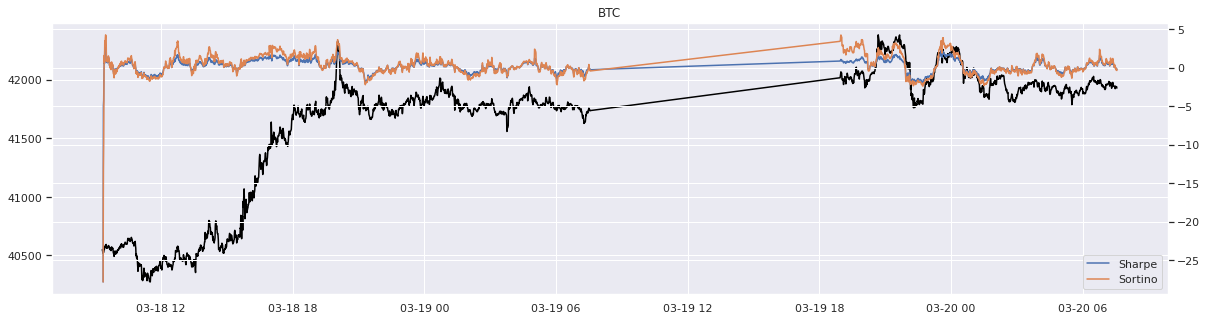

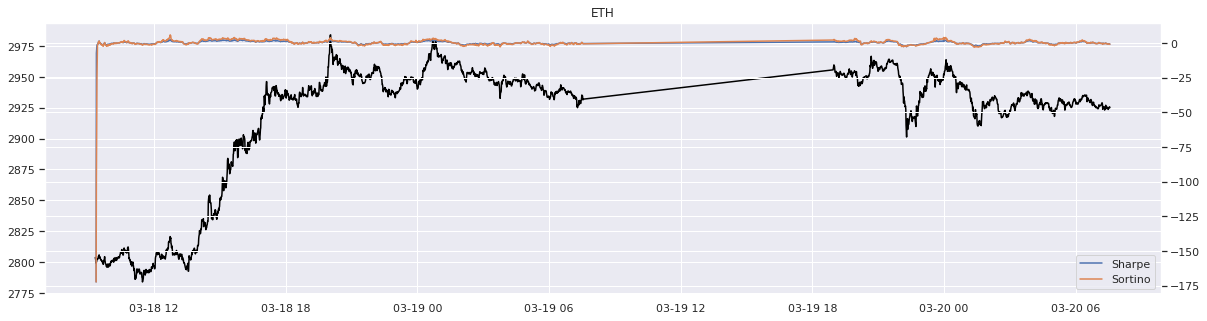

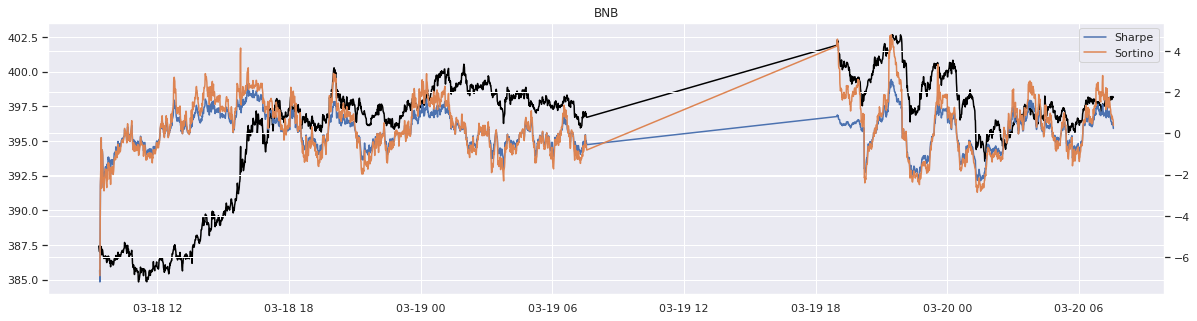

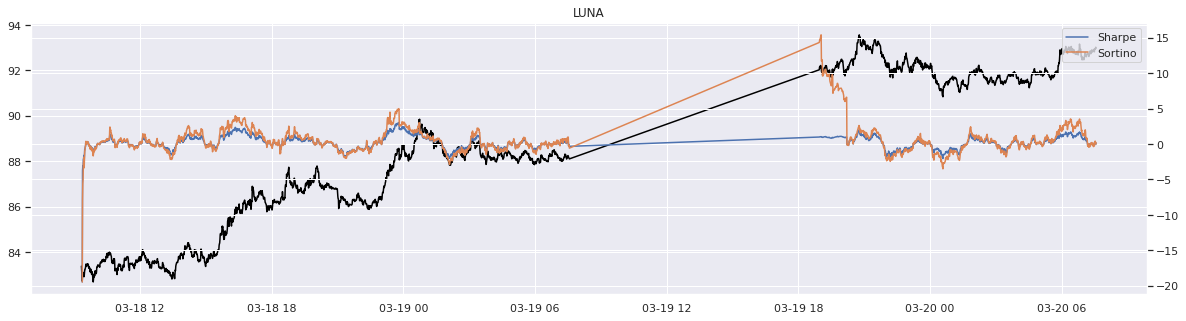

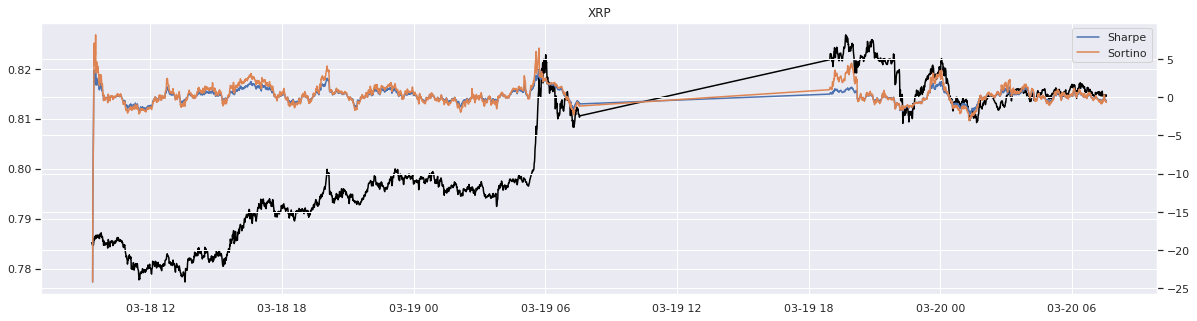

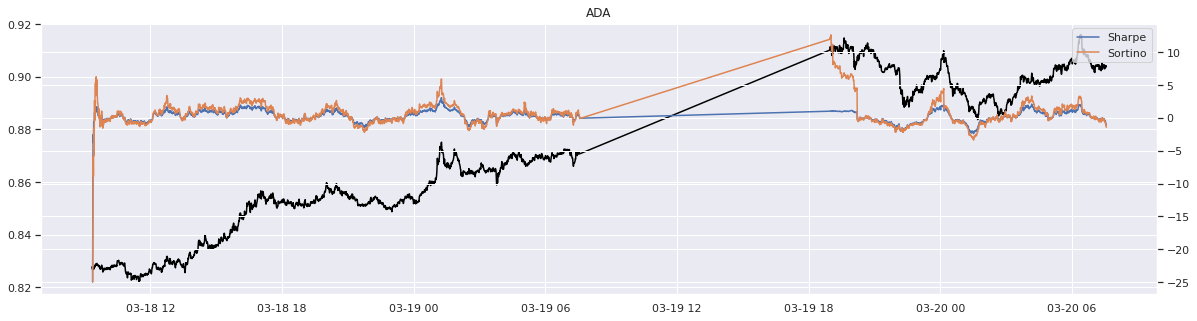

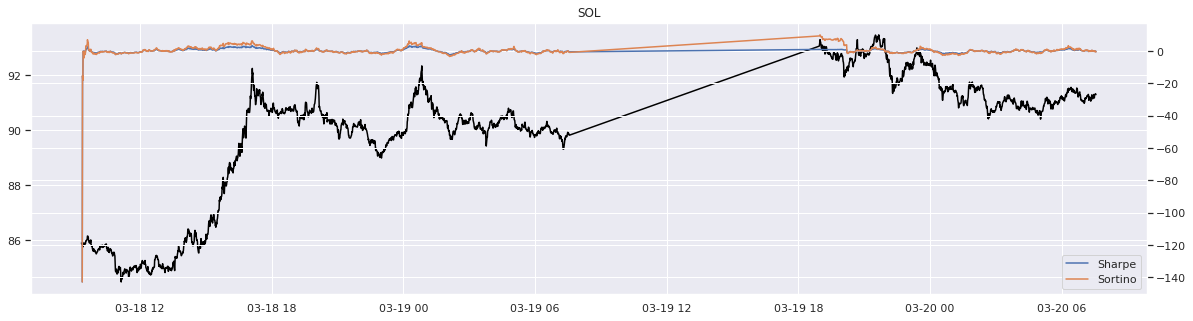

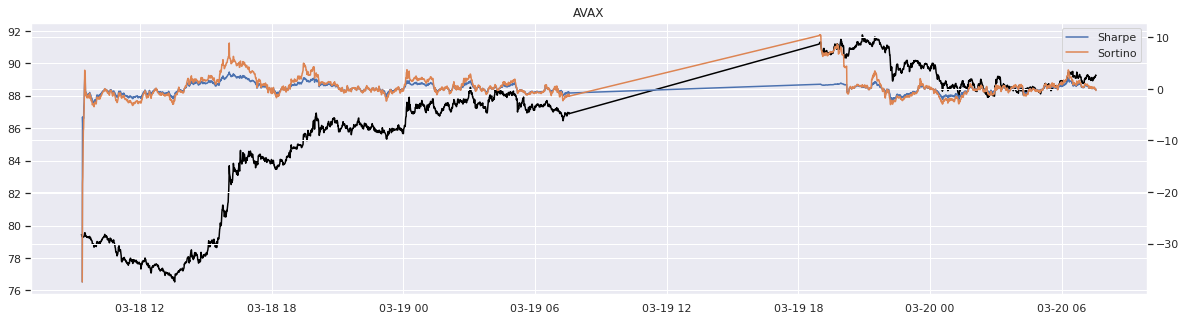

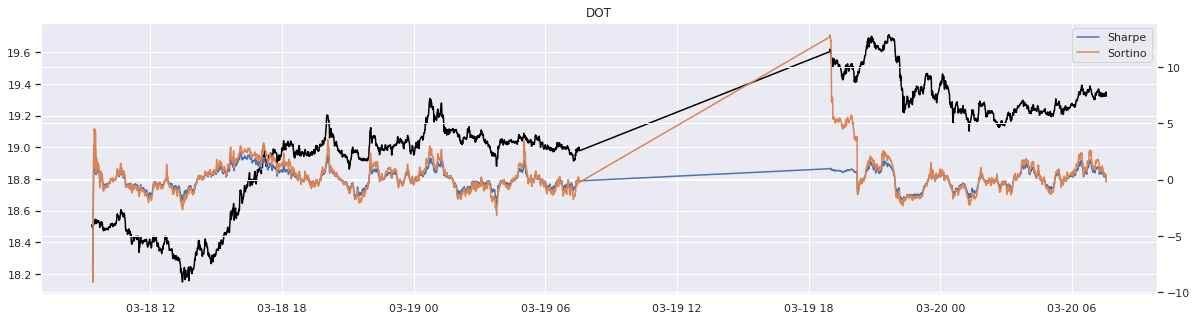

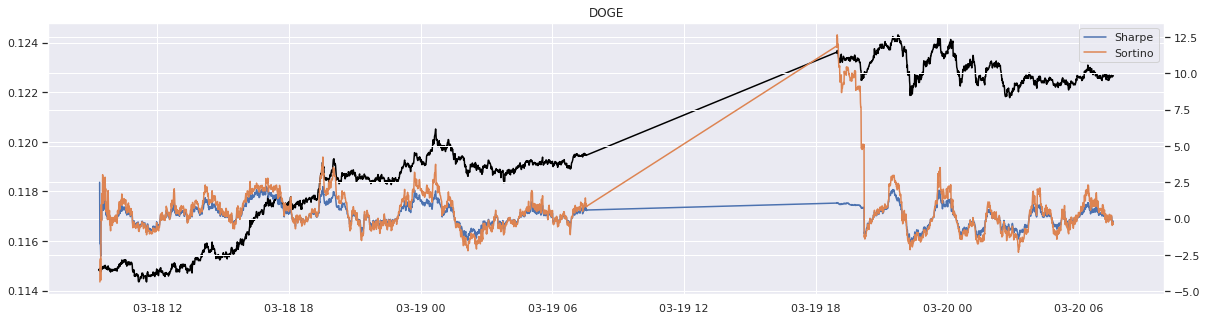

In [ ]:
for crypto_i in crypto_list:
  filter_crypto_i = df['Crypto']==crypto_i
  fig, ax1 = plt.subplots()
  ax2 = ax1.twinx()
  for col in ['Sharpe', 'Sortino']:
    plt.plot(df.loc[filter_crypto_i, 'Timestamp'], df.loc[filter_crypto_i, col], label=col)
  ax1.plot(df.loc[filter_crypto_i, 'Timestamp'], df.loc[filter_crypto_i, 'Price'], label='Price', color='black')
  plt.title(crypto_i)
  plt.legend()
  plt.show()

# 05 - Create Target

In [ ]:
# Separation between rows = 45"

# Target horizon (how long from now we want the model to predict)
horizon_in_mins = 20  # in mins
horizon_rows = int(horizon_in_mins*60/45)
horizon_rows

26

## 05_01 Numerical Value

In [ ]:
# Target precio
df['TARGET_num_'+str(horizon_rows)] = (df['Price'].shift(-horizon_rows*len(crypto_list))/df['Price'])
df

Timestamp Crypto         Price        Vol24h      SMA10  \
0     2022-03-18 09:19:30    BTC  40549.971253  3.662266e+09        NaN   
1     2022-03-18 09:19:30    ETH   2803.589503  3.608459e+09        NaN   
2     2022-03-18 09:19:30    BNB    387.411775  3.388266e+08        NaN   
3     2022-03-18 09:19:30   LUNA     83.376470  7.104783e+08        NaN   
4     2022-03-18 09:19:30    XRP      0.785183  3.462047e+08        NaN   
...                   ...    ...           ...           ...        ...   
27595 2022-03-20 07:33:45    ADA      0.903973  3.083694e+08   0.903886   
27596 2022-03-20 07:33:45    SOL     91.299298  5.352882e+08  91.283008   
27597 2022-03-20 07:33:45   AVAX     89.254300  6.056923e+08  89.156357   
27598 2022-03-20 07:33:45    DOT     19.321665  2.299840e+08  19.333962   
27599 2022-03-20 07:33:45   DOGE      0.122672  1.999713e+08   0.122657   

           SMA50     SMA100      EMA10      EMA50     EMA100  ...  \
0            NaN        NaN        NaN        NaN        NaN  ...   
1            NaN        NaN        NaN        NaN        NaN  ...   
2            NaN        NaN        NaN        NaN        NaN  ...   
3            NaN        NaN        NaN        NaN        NaN  ...   
4            NaN        NaN        NaN        NaN        NaN  ...   
...          ...        ...        ...        ...        ...  ...   
27595   0.903641   0.906283   0.903869   0.904178   0.904776  ...   
27596  91.186445  91.282237  91.282095  91.229396  91.219884  ...   
27597  89.060006  89.142201  89.168108  89.094541  89.056072  ...   
27598  19.332333  19.342120  19.333906  19.334274  19.327434  ...   
27599   0.122632   0.122722   0.122650   0.122647   0.122651  ...   

       MOMLowerThan0  MOMHigherThan0  CMOHigherThan50  CMOLowerThan50  \
0                  0               0                0               0   
1                  0               0                0               0   
2                  0               0                0               0   
3                  0               0                0               0   
4                  0               0                0               0   
...              ...             ...              ...             ...   
27595              0               1                0               1   
27596              0               1                0               1   
27597              0               1                0               1   
27598              0               1                0               1   
27599              0               1                0               1   

       CMOLowerThan-50  CMOHigherThan-50    Sharpe   Sortino   NATR100  \
0                    0                 0       NaN       NaN       NaN   
1                    0                 0       NaN       NaN       NaN   
2                    0                 0       NaN       NaN       NaN   
3                    0                 0       NaN       NaN       NaN   
4                    0                 0       NaN       NaN       NaN   
...                ...               ...       ...       ...       ...   
27595                0                 1 -1.103197 -1.434583  1.387184   
27596                0                 1 -0.402642 -0.543754  0.787360   
27597                0                 1 -0.227205 -0.310252  1.015969   
27598                0                 1 -0.139809 -0.203143  0.715092   
27599                0                 1 -0.278984 -0.404601  0.604439   

       TARGET_num_26  
0           1.000215  
1           0.998433  
2           0.998015  
3           0.998866  
4           1.001190  
...              ...  
27595            NaN  
27596            NaN  
27597            NaN  
27598            NaN  
27599            NaN  

[27600 rows x 28 columns]

## 05_02 Categorical Target

In [ ]:
# Target up by 2%
df['TARGET_cat2_'+str(horizon_rows)] = ((df['Price'].shift(-horizon_rows*len(crypto_list))/df['Price']) > 1.02).astype(int)

# Target up by 1%
df['TARGET_cat1_'+str(horizon_rows)] = ((df['Price'].shift(-horizon_rows*len(crypto_list))/df['Price']) > 1.01).astype(int)

# Target up by 0.5%
df['TARGET_cat05_'+str(horizon_rows)] = ((df['Price'].shift(-horizon_rows*len(crypto_list))/df['Price']) > 1.005).astype(int)

# Target up
df['TARGET_cat0_'+str(horizon_rows)] = ((df['Price'].shift(-horizon_rows*len(crypto_list))/df['Price']) > 1).astype(int)

df

Timestamp Crypto         Price        Vol24h      SMA10  \
0     2022-03-18 09:19:30    BTC  40549.971253  3.662266e+09        NaN   
1     2022-03-18 09:19:30    ETH   2803.589503  3.608459e+09        NaN   
2     2022-03-18 09:19:30    BNB    387.411775  3.388266e+08        NaN   
3     2022-03-18 09:19:30   LUNA     83.376470  7.104783e+08        NaN   
4     2022-03-18 09:19:30    XRP      0.785183  3.462047e+08        NaN   
...                   ...    ...           ...           ...        ...   
27595 2022-03-20 07:33:45    ADA      0.903973  3.083694e+08   0.903886   
27596 2022-03-20 07:33:45    SOL     91.299298  5.352882e+08  91.283008   
27597 2022-03-20 07:33:45   AVAX     89.254300  6.056923e+08  89.156357   
27598 2022-03-20 07:33:45    DOT     19.321665  2.299840e+08  19.333962   
27599 2022-03-20 07:33:45   DOGE      0.122672  1.999713e+08   0.122657   

           SMA50     SMA100      EMA10      EMA50     EMA100  ...  \
0            NaN        NaN        NaN        NaN        NaN  ...   
1            NaN        NaN        NaN        NaN        NaN  ...   
2            NaN        NaN        NaN        NaN        NaN  ...   
3            NaN        NaN        NaN        NaN        NaN  ...   
4            NaN        NaN        NaN        NaN        NaN  ...   
...          ...        ...        ...        ...        ...  ...   
27595   0.903641   0.906283   0.903869   0.904178   0.904776  ...   
27596  91.186445  91.282237  91.282095  91.229396  91.219884  ...   
27597  89.060006  89.142201  89.168108  89.094541  89.056072  ...   
27598  19.332333  19.342120  19.333906  19.334274  19.327434  ...   
27599   0.122632   0.122722   0.122650   0.122647   0.122651  ...   

       CMOLowerThan-50  CMOHigherThan-50    Sharpe   Sortino   NATR100  \
0                    0                 0       NaN       NaN       NaN   
1                    0                 0       NaN       NaN       NaN   
2                    0                 0       NaN       NaN       NaN   
3                    0                 0       NaN       NaN       NaN   
4                    0                 0       NaN       NaN       NaN   
...                ...               ...       ...       ...       ...   
27595                0                 1 -1.103197 -1.434583  1.387184   
27596                0                 1 -0.402642 -0.543754  0.787360   
27597                0                 1 -0.227205 -0.310252  1.015969   
27598                0                 1 -0.139809 -0.203143  0.715092   
27599                0                 1 -0.278984 -0.404601  0.604439   

       TARGET_num_26  TARGET_cat2_26  TARGET_cat1_26  TARGET_cat05_26  \
0           1.000215               0               0                0   
1           0.998433               0               0                0   
2           0.998015               0               0                0   
3           0.998866               0               0                0   
4           1.001190               0               0                0   
...              ...             ...             ...              ...   
27595            NaN               0               0                0   
27596            NaN               0               0                0   
27597            NaN               0               0                0   
27598            NaN               0               0                0   
27599            NaN               0               0                0   

       TARGET_cat0_26  
0                   1  
1                   0  
2                   0  
3                   0  
4                   1  
...               ...  
27595               0  
27596               0  
27597               0  
27598               0  
27599               0  

[27600 rows x 32 columns]

In [ ]:
cat_targets = [col for col in df.columns if "TARGET_cat" in col]
cat_targets

['TARGET_cat2_26', 'TARGET_cat1_26', 'TARGET_cat05_26', 'TARGET_cat0_26']

In [ ]:
df[cat_targets].mean()

TARGET_cat2_26     0.007645
TARGET_cat1_26     0.024384
TARGET_cat05_26    0.098152
TARGET_cat0_26     0.532138
dtype: float64

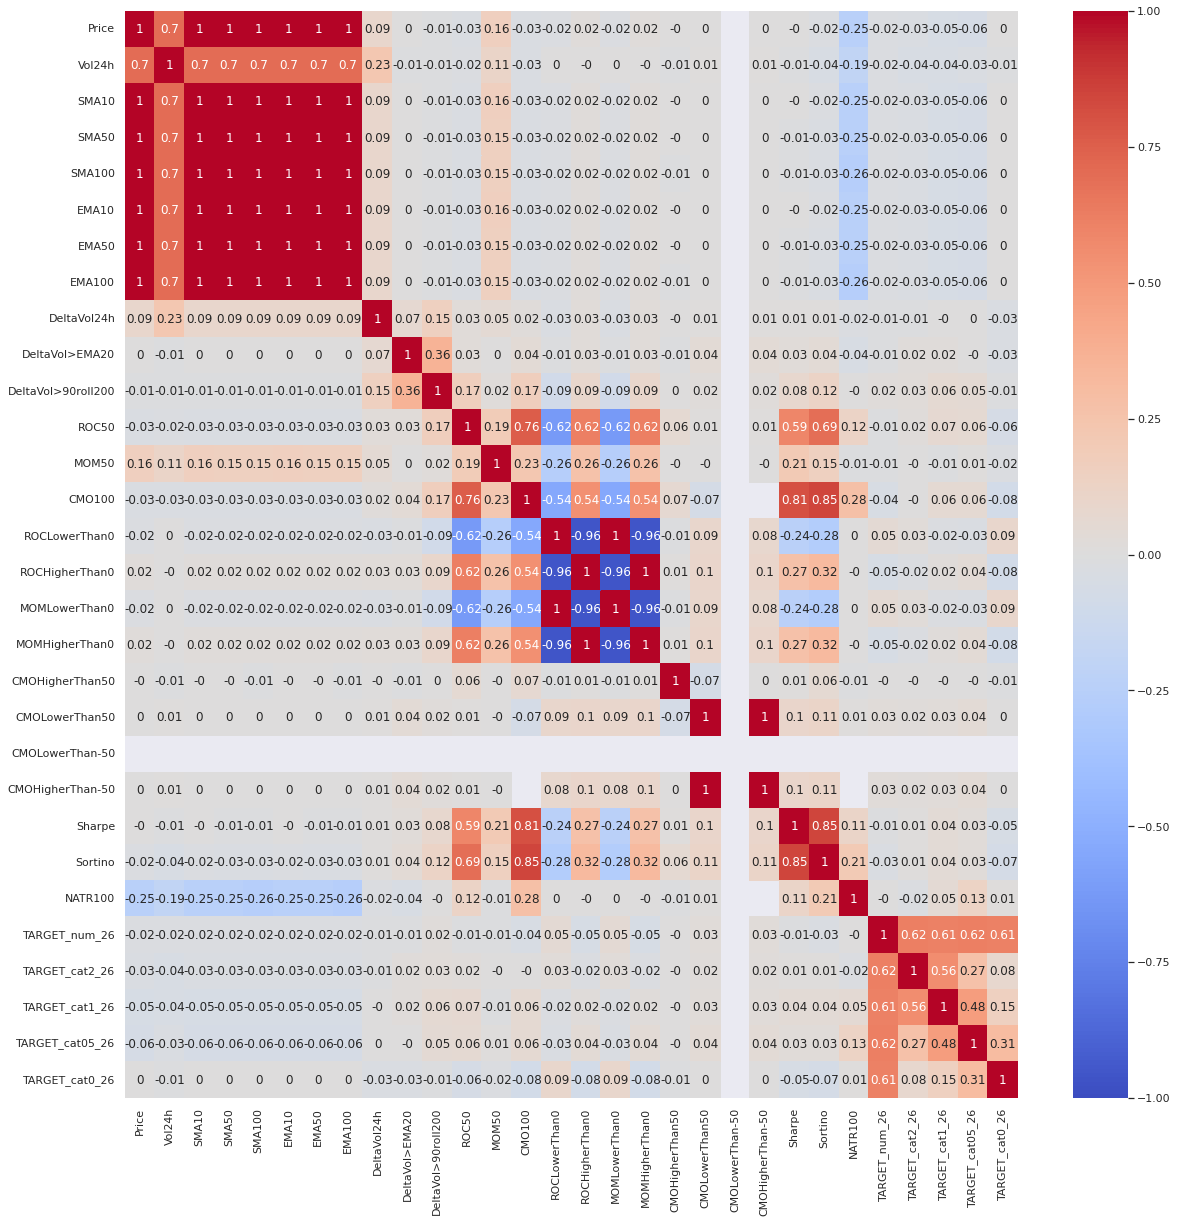

In [ ]:
# Visualización coeficientes Pearson
plt.figure(figsize=(20,20))
sns.heatmap(np.round(df.corr(),2), 
            vmin=-1, vmax=1, 
            annot=True, cmap="coolwarm")
plt.show()

# 06 - Train model

## 06_01 - Process data

In [ ]:
df.tail(3)

Timestamp Crypto      Price        Vol24h      SMA10  \
27597 2022-03-20 07:33:45   AVAX  89.254300  6.056923e+08  89.156357   
27598 2022-03-20 07:33:45    DOT  19.321665  2.299840e+08  19.333962   
27599 2022-03-20 07:33:45   DOGE   0.122672  1.999713e+08   0.122657   

           SMA50     SMA100      EMA10      EMA50     EMA100  ...  \
27597  89.060006  89.142201  89.168108  89.094541  89.056072  ...   
27598  19.332333  19.342120  19.333906  19.334274  19.327434  ...   
27599   0.122632   0.122722   0.122650   0.122647   0.122651  ...   

       CMOLowerThan-50  CMOHigherThan-50    Sharpe   Sortino   NATR100  \
27597                0                 1 -0.227205 -0.310252  1.015969   
27598                0                 1 -0.139809 -0.203143  0.715092   
27599                0                 1 -0.278984 -0.404601  0.604439   

       TARGET_num_26  TARGET_cat2_26  TARGET_cat1_26  TARGET_cat05_26  \
27597            NaN               0               0                0   
27598            NaN               0               0                0   
27599            NaN               0               0                0   

       TARGET_cat0_26  
27597               0  
27598               0  
27599               0  

[3 rows x 32 columns]

In [ ]:
df.columns

Index(['Timestamp', 'Crypto', 'Price', 'Vol24h', 'SMA10', 'SMA50', 'SMA100',
       'EMA10', 'EMA50', 'EMA100', 'DeltaVol24h', 'DeltaVol>EMA20',
       'DeltaVol>90roll200', 'ROC50', 'MOM50', 'CMO100', 'ROCLowerThan0',
       'ROCHigherThan0', 'MOMLowerThan0', 'MOMHigherThan0', 'CMOHigherThan50',
       'CMOLowerThan50', 'CMOLowerThan-50', 'CMOHigherThan-50', 'Sharpe',
       'Sortino', 'NATR100', 'TARGET_num_26', 'TARGET_cat2_26',
       'TARGET_cat1_26', 'TARGET_cat05_26', 'TARGET_cat0_26'],
      dtype='object')

In [ ]:
cols_to_make_rel = ['SMA10', 'SMA50', 'SMA100', 'EMA10', 'EMA50', 'EMA100']
for col in cols_to_make_rel:
  df[col] = df[col]/df['Price']
df = df.dropna()
df

Timestamp Crypto         Price        Vol24h     SMA10  \
1000  2022-03-18 10:36:00    BTC  40619.715155  3.513081e+09  1.000346   
1001  2022-03-18 10:36:00    ETH   2805.625085  3.529865e+09  1.000710   
1002  2022-03-18 10:36:00    BNB    386.889615  3.414159e+08  1.001175   
1003  2022-03-18 10:36:00   LUNA     83.992795  7.435474e+08  0.998777   
1004  2022-03-18 10:36:00    XRP      0.785526  3.347273e+08  1.000320   
...                   ...    ...           ...           ...       ...   
27335 2022-03-20 07:14:15    ADA      0.902679  3.123859e+08  1.001508   
27336 2022-03-20 07:14:15    SOL     91.092786  5.375236e+08  1.001564   
27337 2022-03-20 07:14:15   AVAX     89.003588  6.106503e+08  1.002229   
27338 2022-03-20 07:14:15    DOT     19.324246  2.326483e+08  1.001484   
27339 2022-03-20 07:14:15   DOGE      0.122514  2.018879e+08  1.001365   

          SMA50    SMA100     EMA10     EMA50    EMA100  ...  CMOLowerThan-50  \
1000   0.999252  0.998801  1.000157  0.999462  0.998808  ...                0   
1001   0.999100  0.998626  1.000421  0.999454  0.998646  ...                0   
1002   0.999835  0.999563  1.000849  1.000172  0.999585  ...                0   
1003   0.995071  0.992468  0.998650  0.995592  0.992545  ...                0   
1004   0.999720  1.000101  1.000153  0.999974  1.000095  ...                0   
...         ...       ...       ...       ...       ...  ...              ...   
27335  1.002500  1.004946  1.001326  1.002518  1.003116  ...                0   
27336  1.001455  1.002149  1.001351  1.001362  1.001330  ...                0   
27337  1.000921  1.001225  1.001710  1.001010  1.000356  ...                0   
27338  1.000954  1.000258  1.001258  1.000760  1.000019  ...                0   
27339  1.001318  1.001723  1.001269  1.001331  1.001239  ...                0   

       CMOHigherThan-50    Sharpe   Sortino   NATR100  TARGET_num_26  \
1000                  1  0.549226  0.838832  0.236205       0.995930   
1001                  1  0.181997  0.289248  0.321225       0.997876   
1002                  1 -0.326798 -0.457992  0.325300       0.996983   
1003                  1  0.637289  0.790298  1.020666       0.990974   
1004                  1  0.096848  0.139009  0.320601       0.995421   
...                 ...       ...       ...       ...            ...   
27335                 1 -0.497666 -0.667987  1.330462       1.001434   
27336                 1 -0.270100 -0.364584  0.834552       1.002267   
27337                 1  0.114145  0.146324  1.073938       1.002817   
27338                 1  0.518323  0.733774  0.747850       0.999866   
27339                 1 -0.181517 -0.284040  0.634035       1.001287   

       TARGET_cat2_26  TARGET_cat1_26  TARGET_cat05_26  TARGET_cat0_26  
1000                0               0                0               0  
1001                0               0                0               0  
1002                0               0                0               0  
1003                0               0                0               0  
1004                0               0                0               0  
...               ...             ...              ...             ...  
27335               0               0                0               1  
27336               0               0                0               1  
27337               0               0                0               1  
27338               0               0                0               0  
27339               0               0                0               1  

[26340 rows x 32 columns]

## 06_01 Train - Test split

In [ ]:
# TOTAL TIMESTAMPS
timestamps = df['Timestamp'].unique()
print(len(timestamps))

# Train - test split
index_to_split = int(0.7*len(timestamps))
timestamps_train = timestamps[:index_to_split]
print(len(timestamps_train))
timestamps_test = timestamps[index_to_split:]
print(len(timestamps_test))

2634
1843
791


In [ ]:
df.columns

Index(['Timestamp', 'Crypto', 'Price', 'Vol24h', 'SMA10', 'SMA50', 'SMA100',
       'EMA10', 'EMA50', 'EMA100', 'DeltaVol24h', 'DeltaVol>EMA20',
       'DeltaVol>90roll200', 'ROC50', 'MOM50', 'CMO100', 'ROCLowerThan0',
       'ROCHigherThan0', 'MOMLowerThan0', 'MOMHigherThan0', 'CMOHigherThan50',
       'CMOLowerThan50', 'CMOLowerThan-50', 'CMOHigherThan-50', 'Sharpe',
       'Sortino', 'NATR100', 'TARGET_num_26', 'TARGET_cat2_26',
       'TARGET_cat1_26', 'TARGET_cat05_26', 'TARGET_cat0_26'],
      dtype='object')

In [ ]:
timestamp = ['Timestamp']
coins = ['Crypto']
feat = ['SMA10', 'SMA50', 'SMA100', 'EMA10', 'EMA50', 'EMA100', 
        'DeltaVol24h', 'DeltaVol>EMA20', 'DeltaVol>90roll200', 
        'ROC50', 'MOM50', 'CMO100', 'ROCLowerThan0',
        'ROCHigherThan0', 'MOMLowerThan0', 'MOMHigherThan0', 'CMOHigherThan50',
        'CMOLowerThan50', 'CMOLowerThan-50', 'CMOHigherThan-50', 'Sharpe', 
        'Sortino', 'NATR100']
targets = ['TARGET_num_26', 'TARGET_cat2_26', 'TARGET_cat1_26', 'TARGET_cat05_26', 'TARGET_cat0_26']

df_train = df.loc[df['Timestamp'].isin(timestamps_train), timestamp + coins + feat + targets]
df_test = df.loc[df['Timestamp'].isin(timestamps_test), timestamp + coins + feat + targets]

In [ ]:
df_train.head(2)

Timestamp Crypto     SMA10     SMA50    SMA100     EMA10  \
1000 2022-03-18 10:36:00    BTC  1.000346  0.999252  0.998801  1.000157   
1001 2022-03-18 10:36:00    ETH  1.000710  0.999100  0.998626  1.000421   

         EMA50    EMA100   DeltaVol24h  DeltaVol>EMA20  ...  CMOLowerThan-50  \
1000  0.999462  0.998808  1.043162e+06             0.0  ...                0   
1001  0.999454  0.998646  1.611978e+06             0.0  ...                0   

      CMOHigherThan-50    Sharpe   Sortino   NATR100  TARGET_num_26  \
1000                 1  0.549226  0.838832  0.236205       0.995930   
1001                 1  0.181997  0.289248  0.321225       0.997876   

      TARGET_cat2_26  TARGET_cat1_26  TARGET_cat05_26  TARGET_cat0_26  
1000               0               0                0               0  
1001               0               0                0               0  

[2 rows x 30 columns]

In [ ]:
df_test.head(2)

Timestamp Crypto     SMA10     SMA50    SMA100     EMA10  \
19430 2022-03-19 21:15:45    BTC  1.000177  1.000928  0.998051  1.000097   
19431 2022-03-19 21:15:45    ETH  1.000141  1.001025  0.999208  1.000019   

          EMA50    EMA100    DeltaVol24h  DeltaVol>EMA20  ...  \
19430  0.999970  0.998623  680121.019356             0.0  ...   
19431  1.000281  0.999669  415639.236674             0.0  ...   

       CMOLowerThan-50  CMOHigherThan-50    Sharpe   Sortino   NATR100  \
19430                0                 1  0.767811  1.361959  0.832412   
19431                0                 1  0.323867  0.518475  0.792919   

       TARGET_num_26  TARGET_cat2_26  TARGET_cat1_26  TARGET_cat05_26  \
19430       1.001961               0               0                0   
19431       1.002253               0               0                0   

       TARGET_cat0_26  
19430               1  
19431               1  

[2 rows x 30 columns]

In [ ]:
len(df_train), len(df_test)

(18430, 7910)

In [ ]:
from sklearn import tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
target = 'TARGET_cat0_26'

arbol_ejemplo = tree.DecisionTreeClassifier(max_depth = 15, min_samples_split=10)
arbol_ejemplo.fit(df_train[feat], df_train[target])

DecisionTreeClassifier(max_depth=15, min_samples_split=10)

Train: 


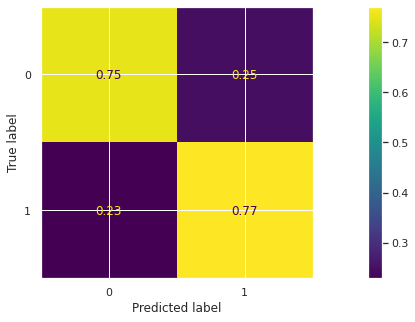

Test: 


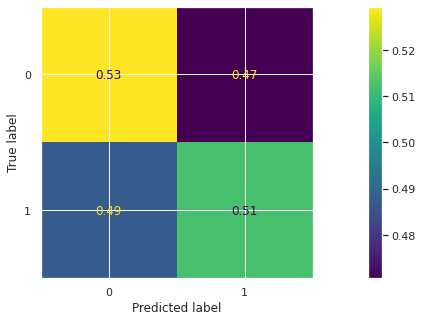

In [ ]:
y_train_predict = arbol_ejemplo.predict(df_train[feat])
y_test_predict = arbol_ejemplo.predict(df_test[feat])

print("Train: ") 
ConfusionMatrixDisplay(confusion_matrix(df_train[target], 
                                        y_train_predict, 
                                        normalize='true')).plot()
plt.show()

print("Test: ")
ConfusionMatrixDisplay(confusion_matrix(df_test[target], 
                                        y_test_predict, 
                                        normalize='true')).plot()
plt.show()

# 07 - Validate Strategy

In [ ]:
horizon

20

In [ ]:
X = 100
comision_entrada = 0.001

i = 0
j = i + horizon

while j < len(timestamps_test):
  
  ti = timestamps_test[i]
  tj = timestamps_test[j]
  
  # Choose coin
  df_i = df.loc[df['Timestamp']==ti, timestamp+coins+targets]
  df_i['score'] = [score[1] for score in arbol_ejemplo.predict_proba(df.loc[df['Timestamp']==ti, feat])]
  df_i = df_i.sort_values('score', ascending=False)
  coin_i = df_i['Crypto'].iloc[0]

  # Buy
  evolucion = df_i['TARGET_num_26'].iloc[0]
  print("Compro ", X, " de ", coin_i, " a las ", ti)
  print(evolucion)
  X = X * (1-comision_entrada) * evolucion
  print("Obtengo ", X, " cuando vendo a las ", tj)
  print()
  print()

  i = j
  j = i + horizon

Compro  100  de  DOT  a las  2022-03-19T21:15:45.000000000
1.00231509584914
Obtengo  100.13127807532909  cuando vendo a las  2022-03-19T21:30:45.000000000


Compro  100.13127807532909  de  LUNA  a las  2022-03-19T21:30:45.000000000
0.9933739333201504
Obtengo  99.36833374851335  cuando vendo a las  2022-03-19T21:45:45.000000000


Compro  99.36833374851335  de  LUNA  a las  2022-03-19T21:45:45.000000000
0.9935207713810749
Obtengo  98.6257790930784  cuando vendo a las  2022-03-19T22:00:45.000000000


Compro  98.6257790930784  de  DOT  a las  2022-03-19T22:00:45.000000000
0.9836956887069218
Obtengo  96.92073593553327  cuando vendo a las  2022-03-19T22:16:30.000000000


Compro  96.92073593553327  de  ETH  a las  2022-03-19T22:16:30.000000000
1.0021792962000255
Obtengo  97.03482297213421  cuando vendo a las  2022-03-19T22:31:30.000000000


Compro  97.03482297213421  de  DOGE  a las  2022-03-19T22:31:30.000000000
1.0021286042716726
Obtengo  97.14413033910287  cuando vendo a las  2022-03-19T22